In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/content/EarthquakeFeatures.csv", sep=",", on_bad_lines="skip")


In [3]:
df.sample(10)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity
8203,1.882057e+06,2766980.075,42964,NEIC,2014,12,10,14,44,46.30,24.401000,94.546600,4.2,84.1,4.600,NaN,72240.04999,NaN
814,1.592752e+06,3052383.339,15749,ISC,2004,11,12,1,59,10.00,27.160000,91.989998,3.9,73.0,4.345,Bomdila Lineament,62139.89817,NaN
12673,-1.855596e+05,4034264.125,2707,ISC,1972,9,3,17,19,4.00,36.209999,73.379997,4.8,0.0,4.800,Karakoram Fault,452937.71810,NaN
49,1.190544e+06,3056964.251,43559,ISC,2013,4,19,6,35,48.38,27.461100,87.978800,4.0,10.0,4.430,Tista Lineament,28324.32937,9.840413
13184,-7.688000e+04,3923687.169,12928,ISC,2002,11,21,14,48,49.00,35.290001,74.660004,3.8,10.0,4.260,Kishtwar Fault,187889.20060,NaN
6626,4.524103e+05,2010158.537,22621,ISC,1999,2,3,23,8,42.00,18.180000,80.550003,4.8,24.0,4.800,Kinnerasani-Godavari Fault,45745.85366,NaN
479,1.883784e+06,3277613.200,43549,ISC,2013,4,16,8,34,12.94,28.875800,95.113700,5.2,31.1,5.450,Bame-Tuting Fault,62911.74977,11.181070
11814,-2.209036e+05,3872238.140,35179,ISC,2005,10,9,16,25,38.64,34.737500,73.133600,3.8,10.0,4.260,Mangla Fault,156003.72970,NaN
6513,1.799914e+06,2702178.473,19034,ISC,1997,12,28,4,16,8.00,23.900000,93.699997,4.8,100.0,4.800,Mat Fault,100600.62510,0.339699
13963,3.451105e+05,3888782.312,22711,ISC,1999,3,13,19,34,49.00,35.130001,79.300003,3.8,33.0,4.260,NaN,36556.22820,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16495 entries, 0 to 16494
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             16495 non-null  float64
 1   Y             16495 non-null  float64
 2   OBJECTID      16495 non-null  int64  
 3   SOURCE        16492 non-null  object 
 4   YR            16495 non-null  int64  
 5   MO            16495 non-null  int64  
 6   DT            16495 non-null  int64  
 7   HR            16495 non-null  int64  
 8   MN            16495 non-null  int64  
 9   SEC           16495 non-null  float64
 10  LAT           16495 non-null  float64
 11  LONG_         16495 non-null  float64
 12  MAGMB         16495 non-null  float64
 13  DEPTH_KM      16495 non-null  float64
 14  MW            16495 non-null  float64
 15  HubName       9712 non-null   object 
 16  HubDist       16495 non-null  float64
 17  FaultDensity  2423 non-null   float64
dtypes: float64(10), int64(6), 

In [5]:
df.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [6]:
import pandas as pd

# Load your dataframe (assume it's already loaded into `df`)

if 'place' in df.columns:
    # 🅰 Dataset Type A — Global
    df_india = df[df['place'].str.contains('India', case=False, na=False)].copy()

    # Parse time and create 'year_month'
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
    df_india['month'] = df_india['time'].dt.month
    df_india['day'] = df_india['time'].dt.day
    df_india['hour'] = df_india['time'].dt.hour
    df_india['minute'] = df_india['time'].dt.minute
    df_india['second'] = df_india['time'].dt.second

    # Optional: standardize columns for further analysis
    df_india.rename(columns={'latitude': 'LAT', 'longitude': 'LONG_', 'mag': 'MAGMB', 'depth': 'DEPTH_KM'}, inplace=True)

else:
    # Dataset Type B — Already India-specific
    df_india = df.copy()

    # Combine YR, MO, DT, HR, MN, SEC into a datetime
    date_cols = ['YR', 'MO', 'DT', 'HR', 'MN', 'SEC']
    for col in date_cols:
        df_india[col] = pd.to_numeric(df_india[col], errors='coerce').fillna(0).astype(int)

    # Safely create datetime (default time to 0 if missing)
    df_india['time'] = pd.to_datetime(dict(
        year=df_india['YR'],
        month=df_india['MO'],
        day=df_india['DT'],
        hour=df_india['HR'],
        minute=df_india['MN'],
        second=df_india['SEC']
    ), errors='coerce')

    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')

# ✅ Now df_india is clean and time-aware, ready for analysis



In [7]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16494 entries, 0 to 16494
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             16494 non-null  float64       
 1   Y             16494 non-null  float64       
 2   OBJECTID      16494 non-null  int64         
 3   SOURCE        16491 non-null  object        
 4   YR            16494 non-null  int64         
 5   MO            16494 non-null  int64         
 6   DT            16494 non-null  int64         
 7   HR            16494 non-null  int64         
 8   MN            16494 non-null  int64         
 9   SEC           16494 non-null  int64         
 10  LAT           16494 non-null  float64       
 11  LONG_         16494 non-null  float64       
 12  MAGMB         16494 non-null  float64       
 13  DEPTH_KM      16494 non-null  float64       
 14  MW            16494 non-null  float64       
 15  HubName       9711 non-null   object     

In [8]:
df_india.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [9]:
df_india.sample(20)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity,time,year_month
5283,-2.719504e+05,1.905014e+06,21635,ISC,2001,1,11,7,29,20,17.100000,73.760002,4.8,5.00,4.800,Chiplun Fault,104826.78520,NaN,2001-01-11 07:29:20,2001-01
782,1.570335e+06,3.054927e+06,7381,ISC,1985,1,7,20,14,45,27.200001,91.769997,4.6,33.00,4.940,Atherkhet Fault,48139.92560,NaN,1985-01-07 20:14:45,1985-01
16203,1.415654e+06,2.870815e+06,14615,ISC,2004,8,4,2,9,12,25.670000,90.099998,4.1,10.00,4.515,Dhubri Fault,32207.72316,NaN,2004-08-04 02:09:12,2004-08
14989,-6.001296e+05,2.651553e+06,22015,ISC,2001,1,27,4,15,14,23.600000,70.260002,4.8,2.00,4.800,Kutch Mainland Fault,19190.76396,NaN,2001-01-27 04:15:14,2001-01
12326,-1.985272e+05,3.863780e+06,35615,ISC,2005,10,13,8,33,48,34.677400,73.382800,4.4,10.00,4.770,Mangla Fault,143265.99780,NaN,2005-10-13 08:33:48,2005-10
5506,2.235015e+05,3.412119e+06,21588,ISC,2002,3,12,10,32,50,30.809999,78.110001,3.7,7.00,4.175,NaN,17795.14129,NaN,2002-03-12 10:32:50,2002-03
908,1.860528e+06,3.026669e+06,20939,ISC,1996,10,1,8,42,14,26.700001,94.599998,4.1,100.00,4.515,NaN,39551.22415,NaN,1996-10-01 08:42:14,1996-10
11860,-2.159917e+05,3.867454e+06,36482,ISC,2007,8,12,13,25,58,34.698200,73.190800,4.4,35.50,4.770,Mangla Fault,150158.67380,NaN,2007-08-12 13:25:58,2007-08
15999,2.711779e+05,3.490859e+06,4089,ISC,1976,5,6,8,21,37,31.530001,78.589996,4.5,87.00,4.855,Kaurik Fault System,36846.78453,NaN,1976-05-06 08:21:37,1976-05
3371,1.914234e+06,8.876794e+05,14786,ISC,2005,1,29,13,7,7,7.834500,93.725700,4.5,33.00,4.855,NaN,85748.54123,NaN,2005-01-29 13:07:07,2005-01


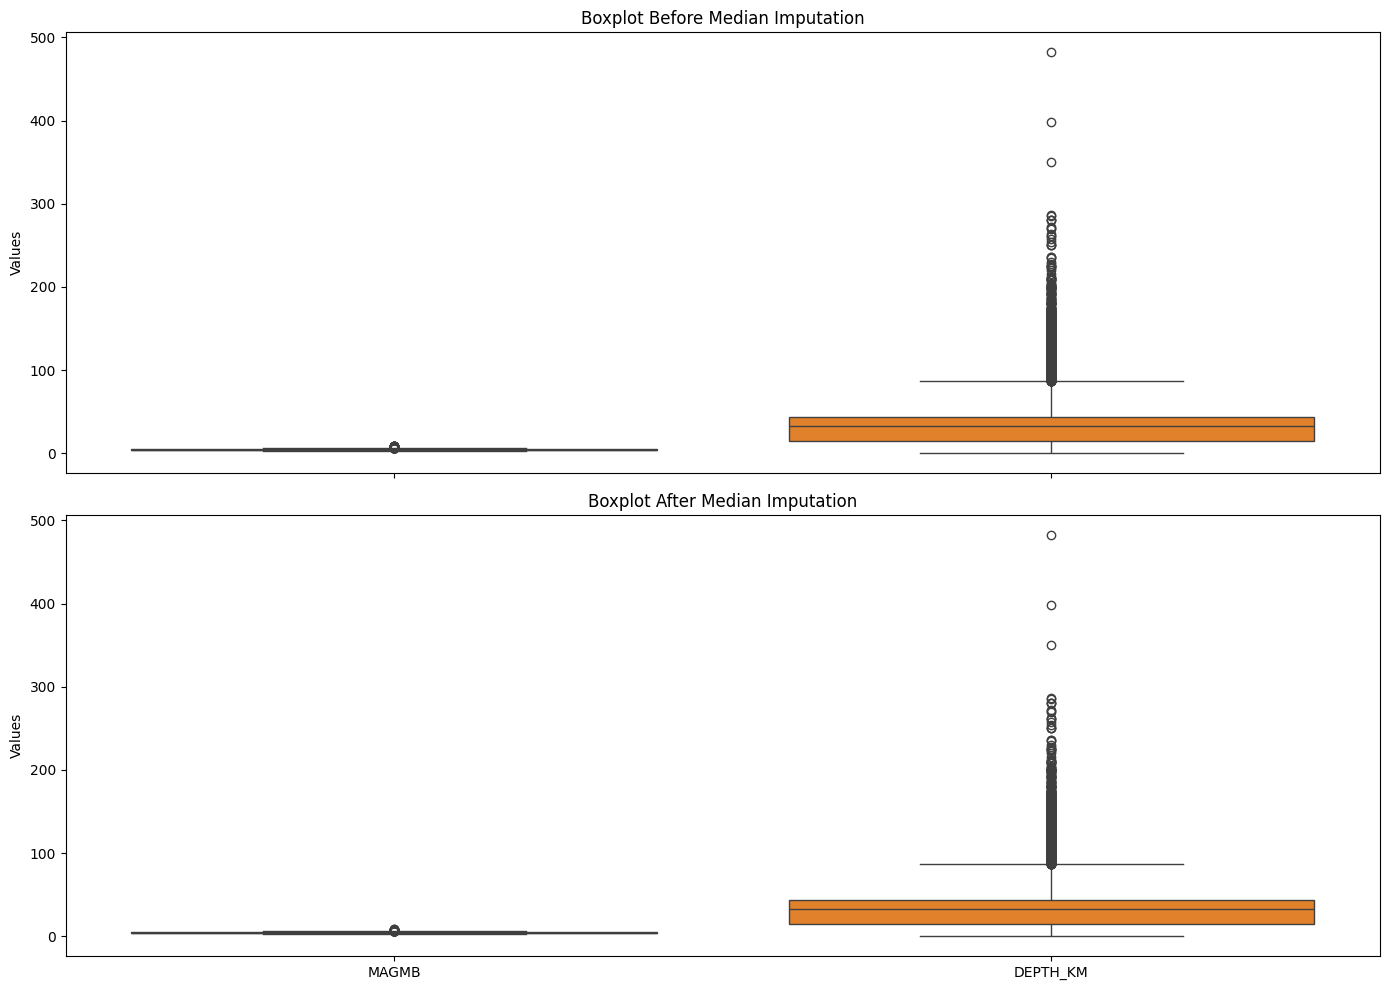

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define potential NA columns for both datasets
global_na_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_fallback_cols = ['MAGMB', 'DEPTH_KM']

# Check which ones are actually present in df_india
columns_with_na = [col for col in global_na_cols if col in df_india.columns]

# Fallback: use MAGMB and DEPTH_KM if global_na_cols are missing
if not columns_with_na:
    columns_with_na = [col for col in india_fallback_cols if col in df_india.columns]

# Proceed only if we have some numeric columns
if columns_with_na:
    # Extract and copy the relevant columns
    df_before = df_india[columns_with_na].copy()
    df_after = df_before.copy()

    # Impute missing values with median
    for col in columns_with_na:
        median_val = df_after[col].median()
        df_after[col] = df_after[col].fillna(median_val)

    # Plot before and after boxplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

    # Before Imputation
    sns.boxplot(data=df_before, ax=axes[0])
    axes[0].set_title("Boxplot Before Median Imputation")
    axes[0].set_ylabel("Values")

    # After Imputation
    sns.boxplot(data=df_after, ax=axes[1])
    axes[1].set_title("Boxplot After Median Imputation")
    axes[1].set_ylabel("Values")

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No suitable numeric columns found for imputation or boxplotting.")

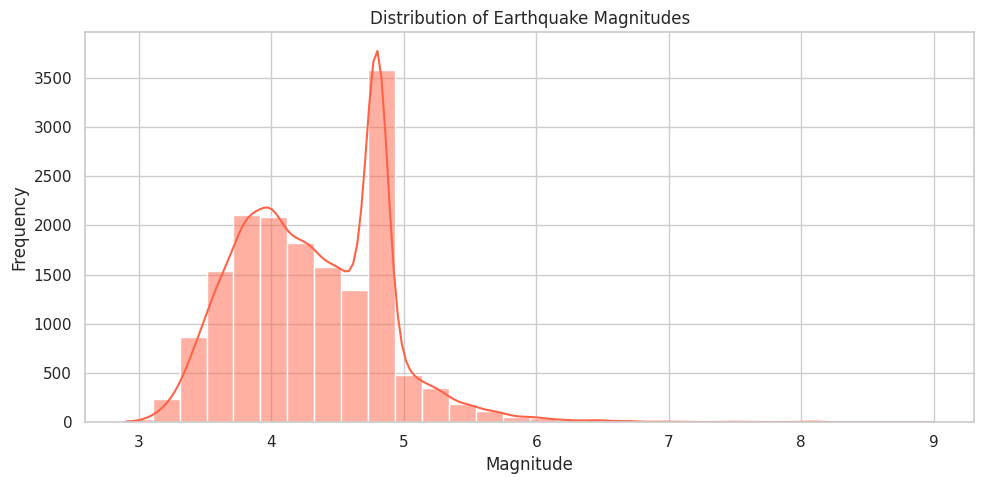

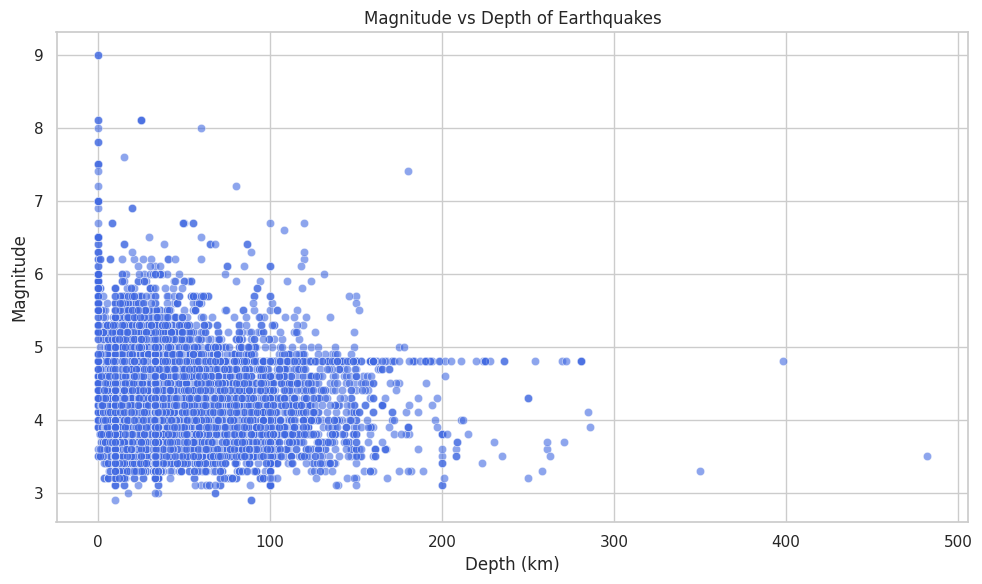

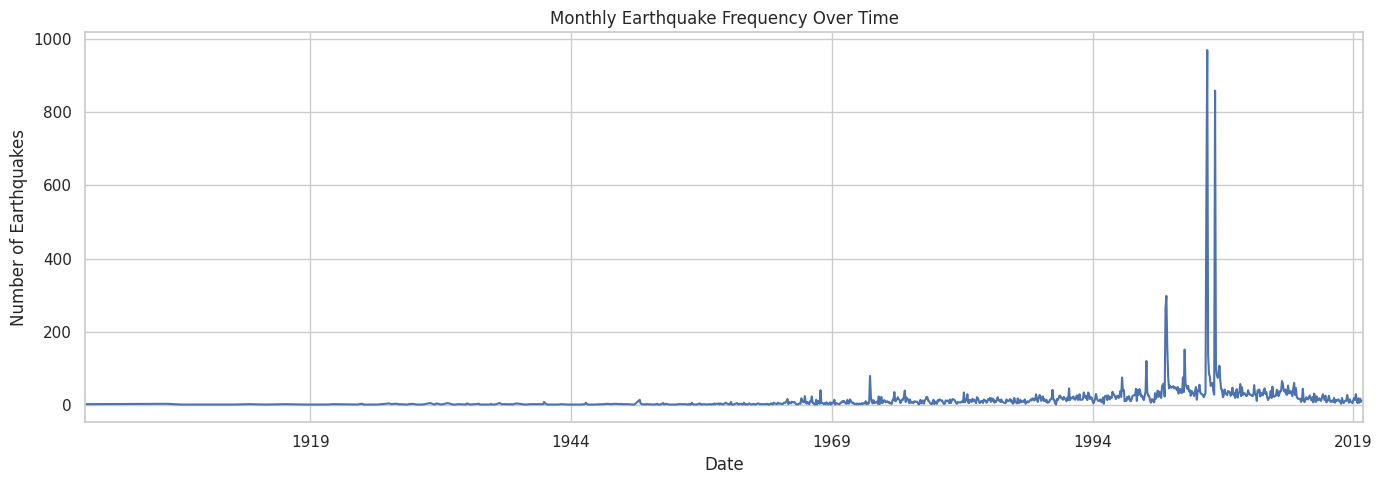

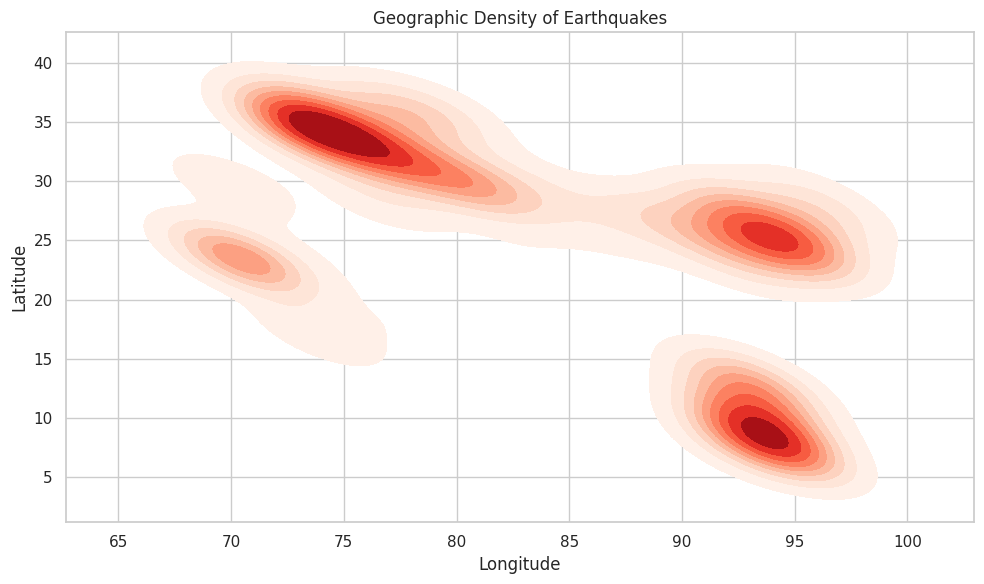

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 🌐 Define fallback mappings for key columns
col_map = {
    'mag': 'mag' if 'mag' in df_india.columns else 'MAGMB',
    'depth': 'depth' if 'depth' in df_india.columns else 'DEPTH_KM',
    'latitude': 'latitude' if 'latitude' in df_india.columns else 'LAT',
    'longitude': 'longitude' if 'longitude' in df_india.columns else 'LONG_',
    'place': 'place' if 'place' in df_india.columns else None
}

# 1. 📊 Distribution of Earthquake Magnitudes
if col_map['mag'] in df_india.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_india[col_map['mag']], bins=30, kde=True, color='tomato')
    plt.title('Distribution of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. 🏙️ Top 10 Locations with Most Earthquakes (only if 'place' exists)
if col_map['place']:
    top_places = df_india[col_map['place']].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=top_places.values,
        y=top_places.index,
        hue=top_places.index,
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title('Top 10 Locations with Most Earthquakes')
    plt.xlabel('Number of Earthquakes')
    plt.ylabel('Place')
    plt.tight_layout()
    plt.show()

# 3. 🎯 Magnitude vs Depth Scatter Plot
if col_map['mag'] in df_india.columns and col_map['depth'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_india,
        x=col_map['depth'],
        y=col_map['mag'],
        alpha=0.6,
        color='royalblue'
    )
    plt.title('Magnitude vs Depth of Earthquakes')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

# 4. 🕒 Earthquakes Over Time (Monthly)
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')
    monthly_counts = df_india.groupby('year_month').size()

    plt.figure(figsize=(14, 5))
    monthly_counts.plot()
    plt.title('Monthly Earthquake Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Earthquakes')
    plt.tight_layout()
    plt.show()

# 5. 🌍 Earthquake Location Heatmap
if col_map['latitude'] in df_india.columns and col_map['longitude'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=df_india[col_map['longitude']],
        y=df_india[col_map['latitude']],
        cmap="Reds",
        fill=True,
        thresh=0.05
    )
    plt.title('Geographic Density of Earthquakes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

✅ Risk level classified using 'MW' column.


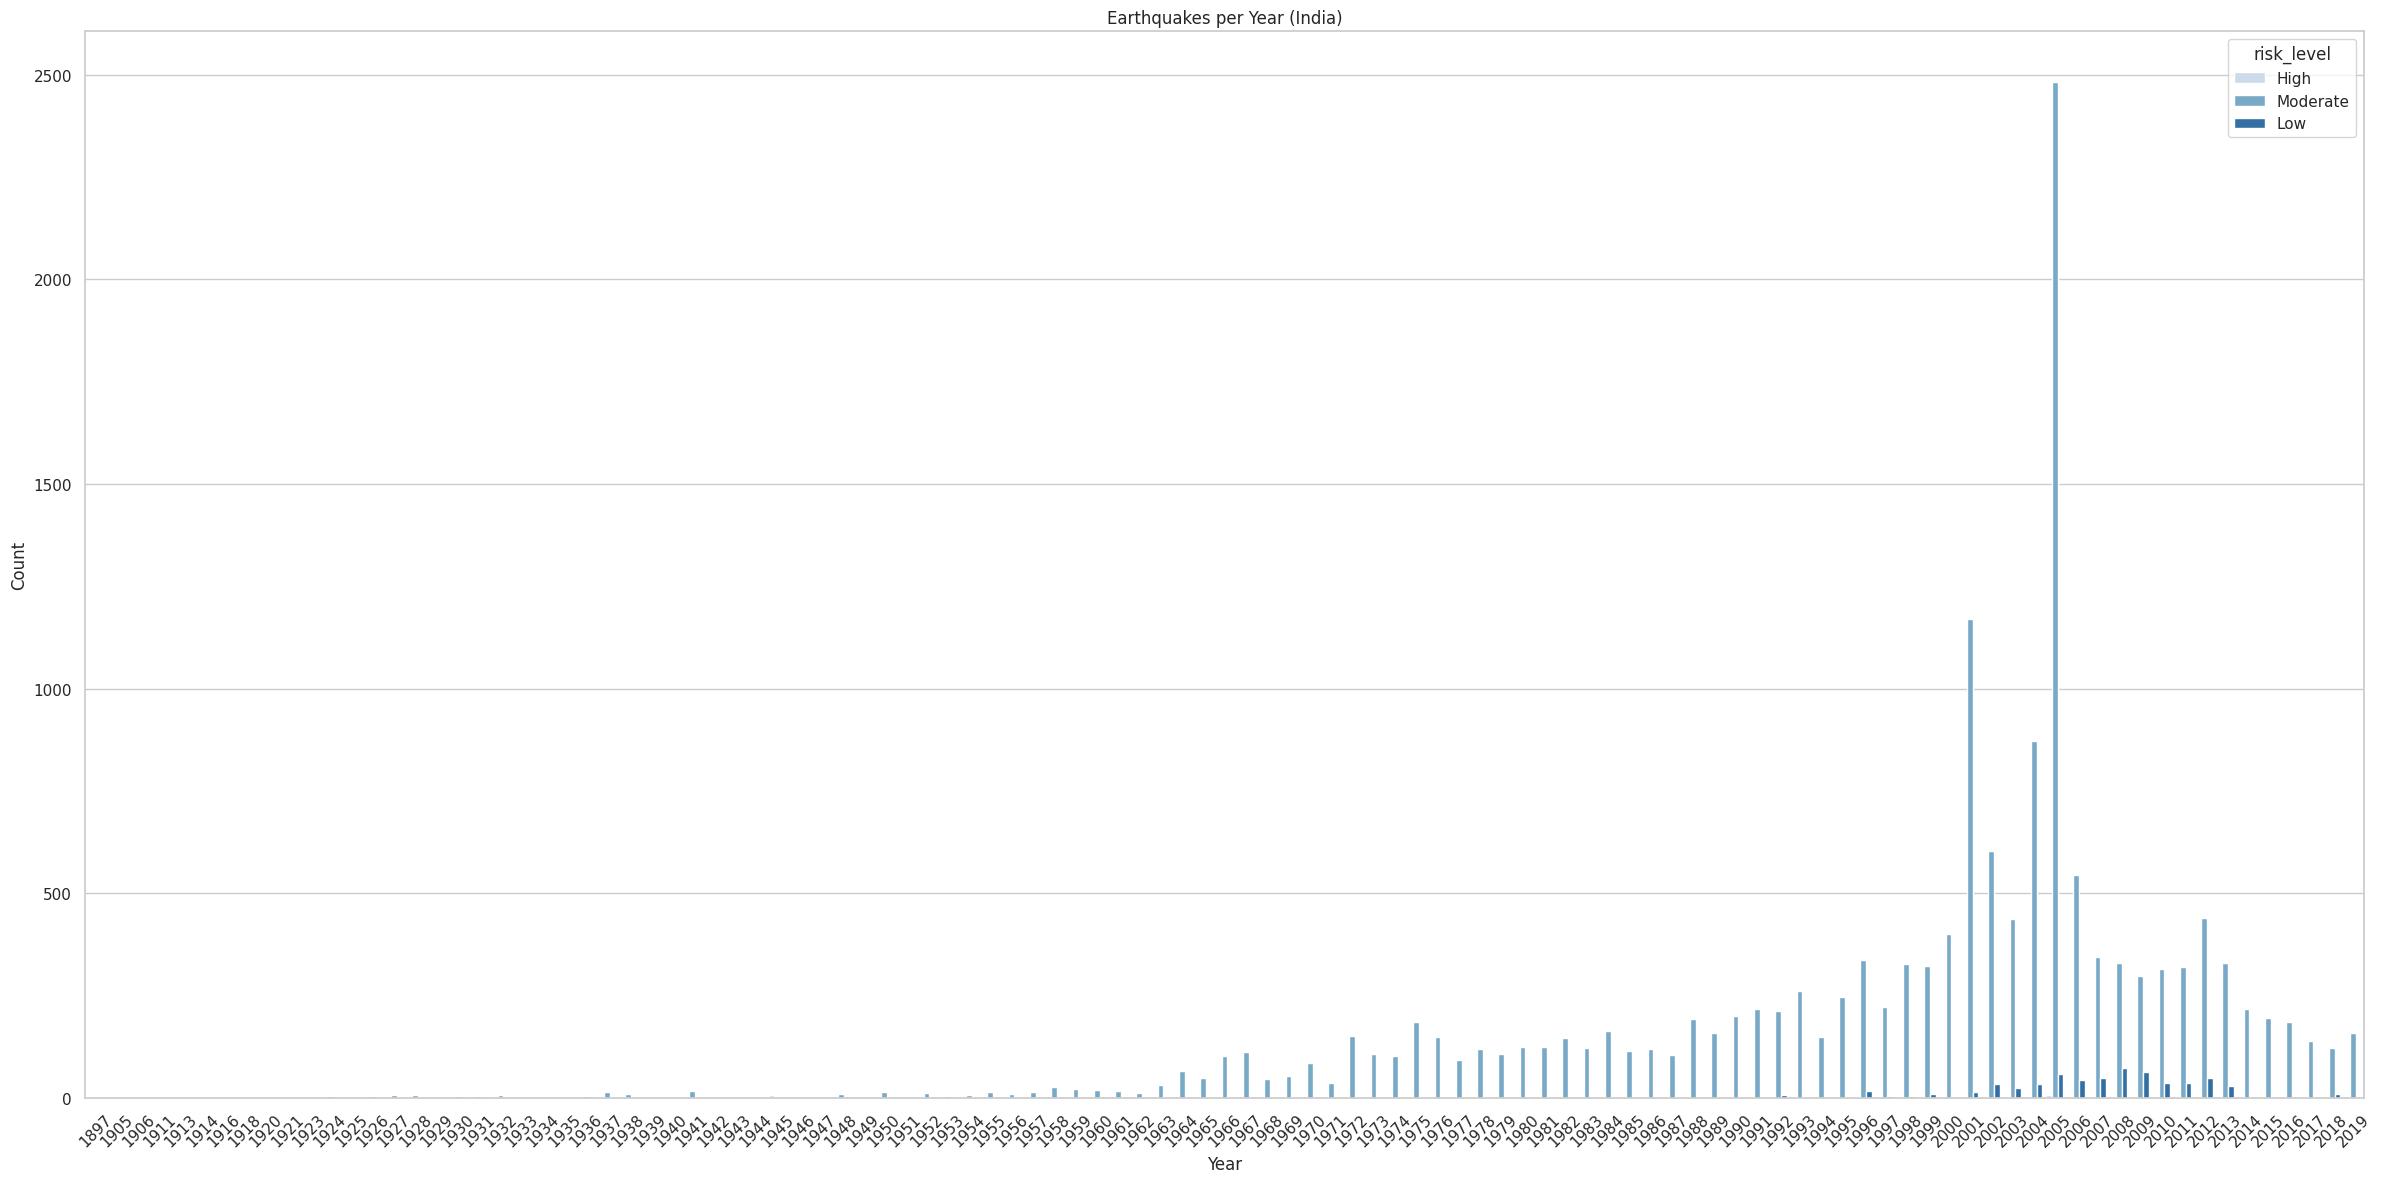

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' column is parsed
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ No 'time' column found.")

# Dynamically determine magnitude column for risk classification
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# Add 'risk_level' if not already added
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'

    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)
    print(f"✅ Risk level classified using '{mag_col}' column.")

# Plot if both 'year' and 'risk_level' are present
if 'year' in df_india.columns and 'risk_level' in df_india.columns:
    plt.figure(figsize=(24, 12))
    sns.countplot(x='year', hue='risk_level', data=df_india, palette='Blues')
    plt.title('Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns 'year' or 'risk_level' not found for plotting.")

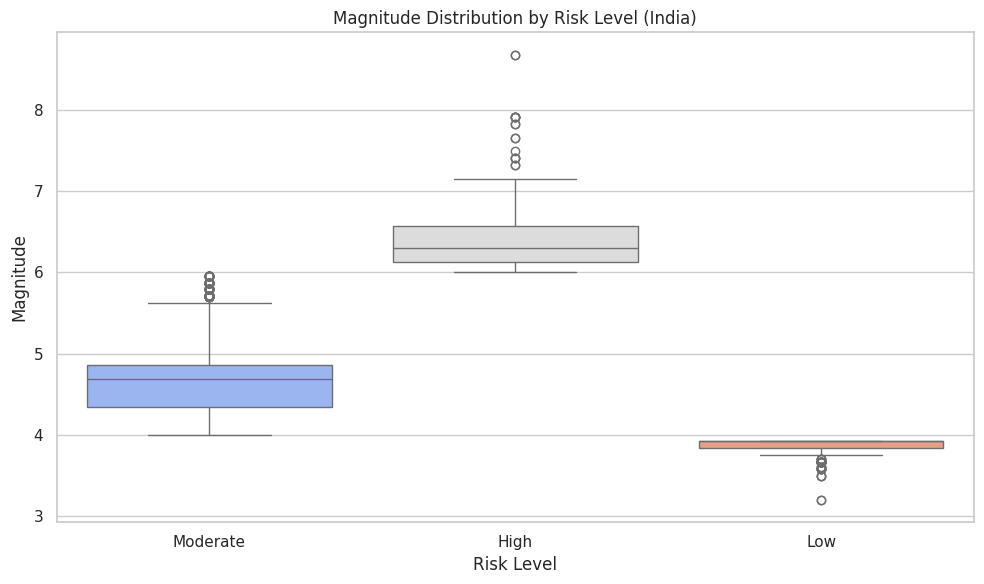

In [13]:
#Magnitude Distribution by Risk Level
# 🔍 Determine magnitude column again if needed
if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Only plot if required columns exist
if 'risk_level' in df_india.columns and mag_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='risk_level',
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='coolwarm',
        legend=False
    )
    plt.title('Magnitude Distribution by Risk Level (India)')
    plt.xlabel('Risk Level')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot boxplot — 'risk_level' or valid magnitude column is missing.")


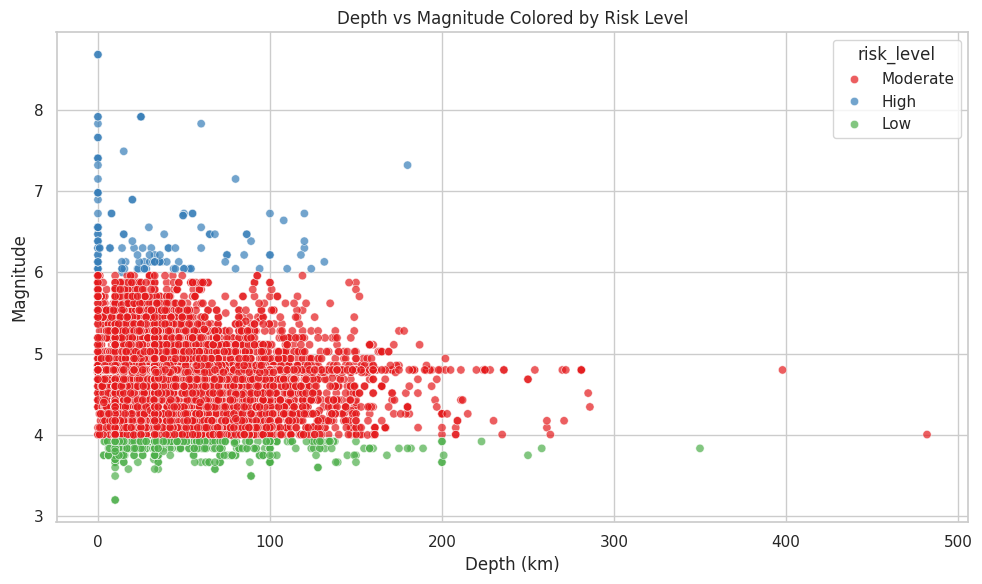

In [14]:
# 🔁 Dynamically re-identify depth and magnitude columns
depth_col = None
for col in ['depth', 'DEPTH_KM']:
    if col in df_india.columns:
        depth_col = col
        break

if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Plot if all required columns are present
if depth_col and mag_col and 'risk_level' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=depth_col,
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='Set1',
        alpha=0.7
    )
    plt.title('Depth vs Magnitude Colored by Risk Level')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot scatter: Required columns missing — check depth, magnitude, or risk_level.")

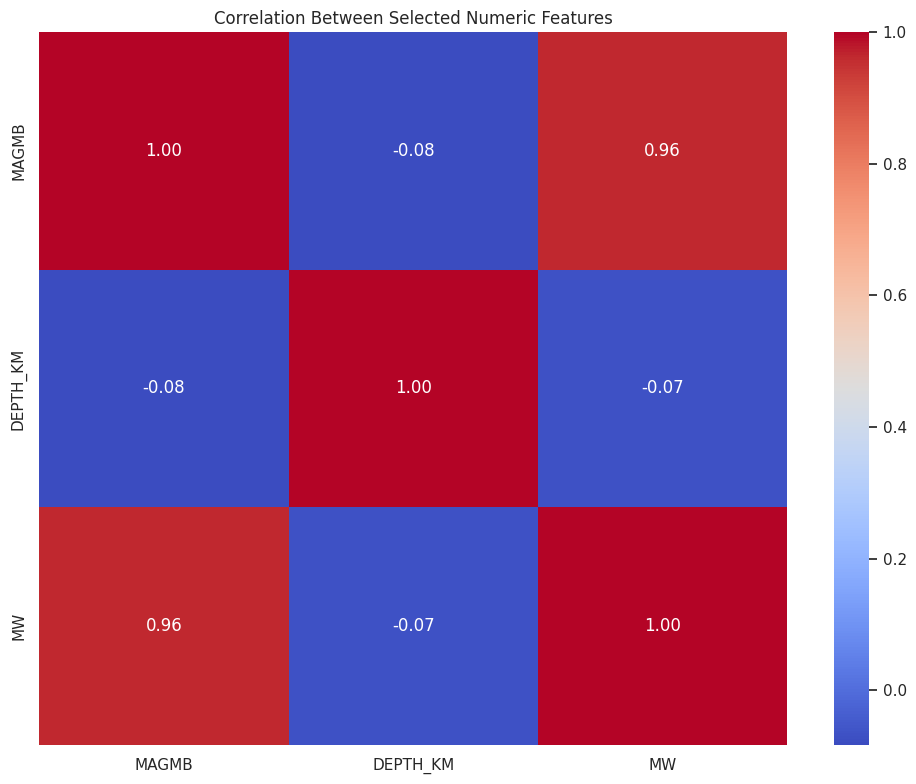

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define possible global NA columns and India fallback numeric columns
possible_corr_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_numeric_cols = ['MAGMB', 'DEPTH_KM', 'MW']

# Dynamically find available numeric columns
columns_with_na = [col for col in possible_corr_cols if col in df_india.columns]

# Fallback to India-specific numeric columns if none found
if not columns_with_na:
    columns_with_na = [col for col in india_numeric_cols if col in df_india.columns]

# ✅ Plot heatmap only if at least 2 numeric columns exist
if len(columns_with_na) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df_india[columns_with_na].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns found for correlation heatmap.")

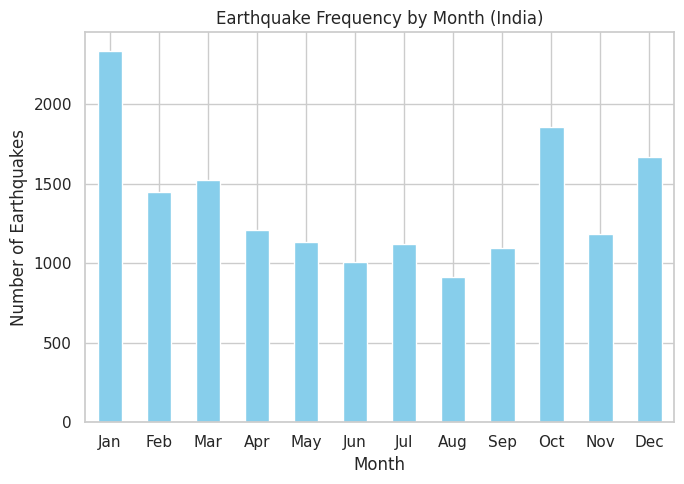

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Ensure 'time' column is datetime
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)

    # ✅ Create 'month' column if not already present
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month

    # ✅ Group and count earthquakes per month
    monthly_counts = df_india.groupby('month').size().reindex(range(1, 13), fill_value=0)

    # ✅ Plotting
    plt.figure(figsize=(7, 5))
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title('Earthquake Frequency by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Number of Earthquakes')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ 'time' column missing. Cannot extract or group by month.")

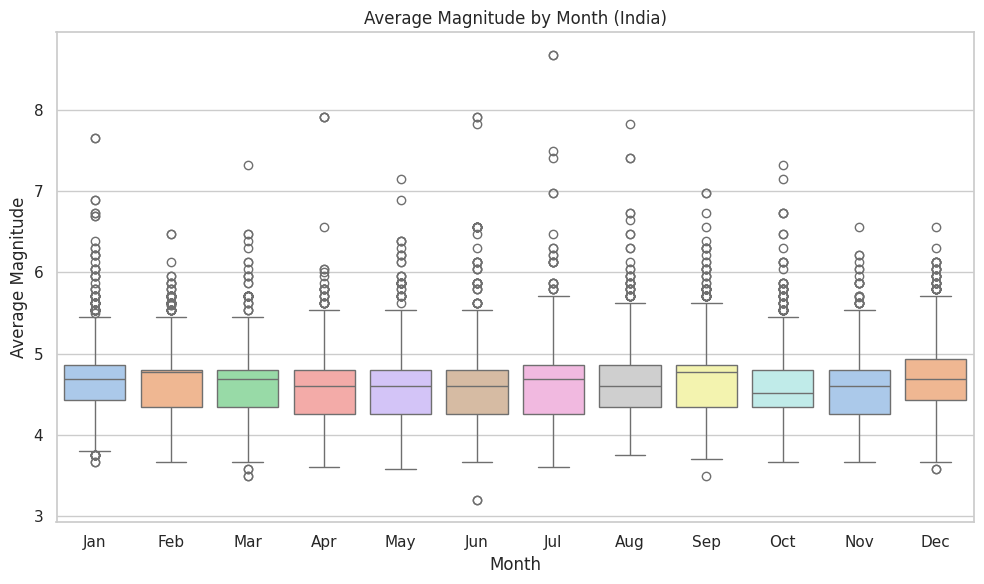

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Find appropriate magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' is datetime and extract 'month'
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month
else:
    print("⚠️ 'time' column is missing or invalid.")

# ✅ Plot if valid magnitude column and month are available
if mag_col and 'month' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='month',
        y=mag_col,
        data=df_india,
        palette='pastel'
    )
    plt.title('Average Magnitude by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Average Magnitude')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot — missing either 'month' or a valid magnitude column.")

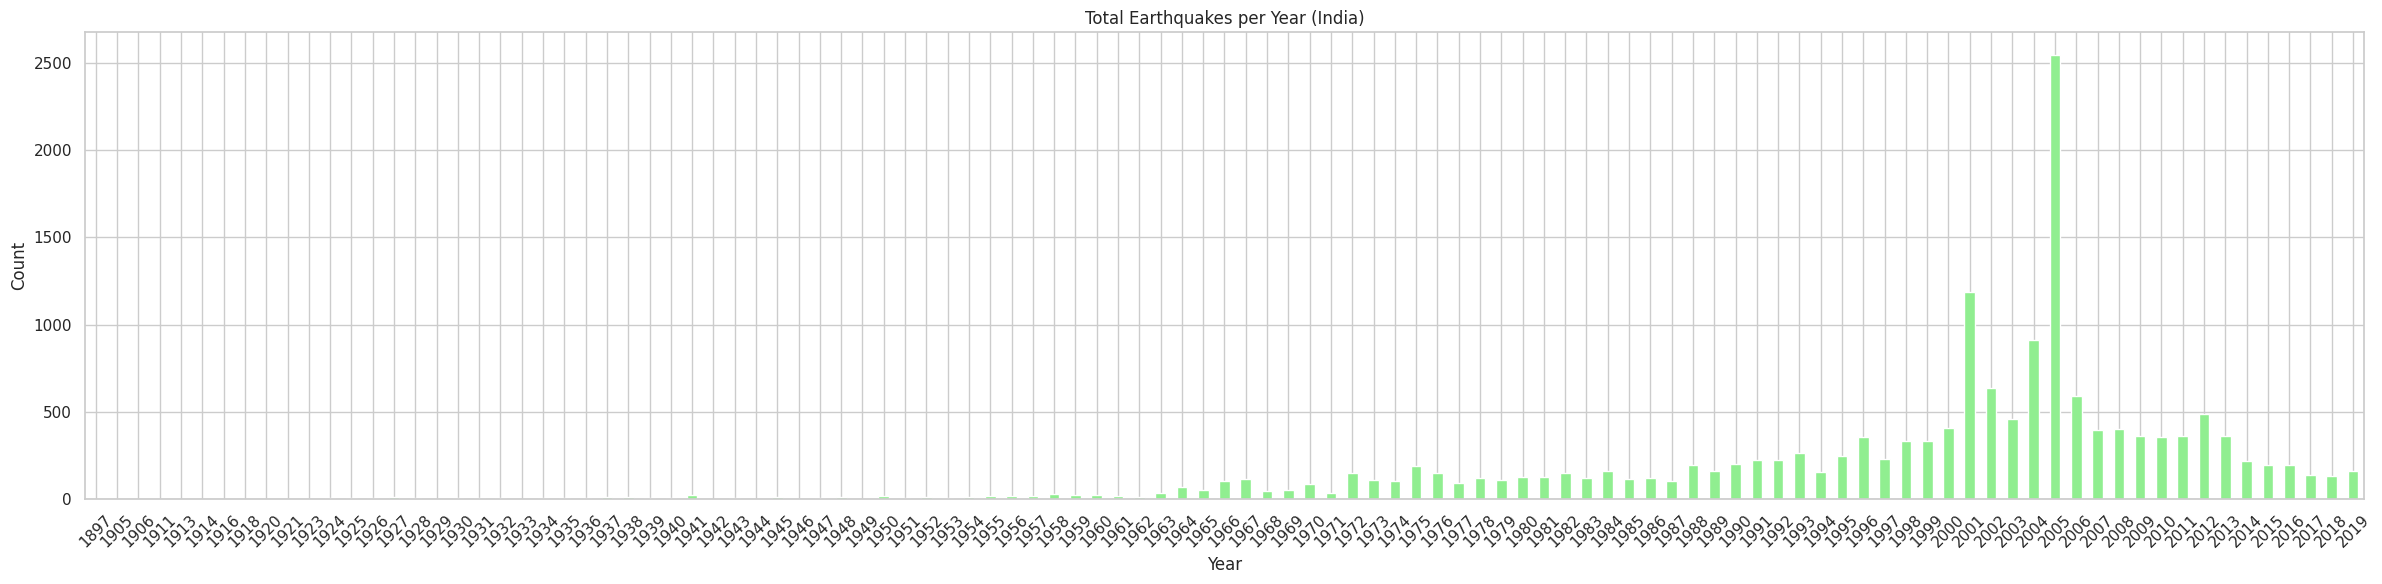

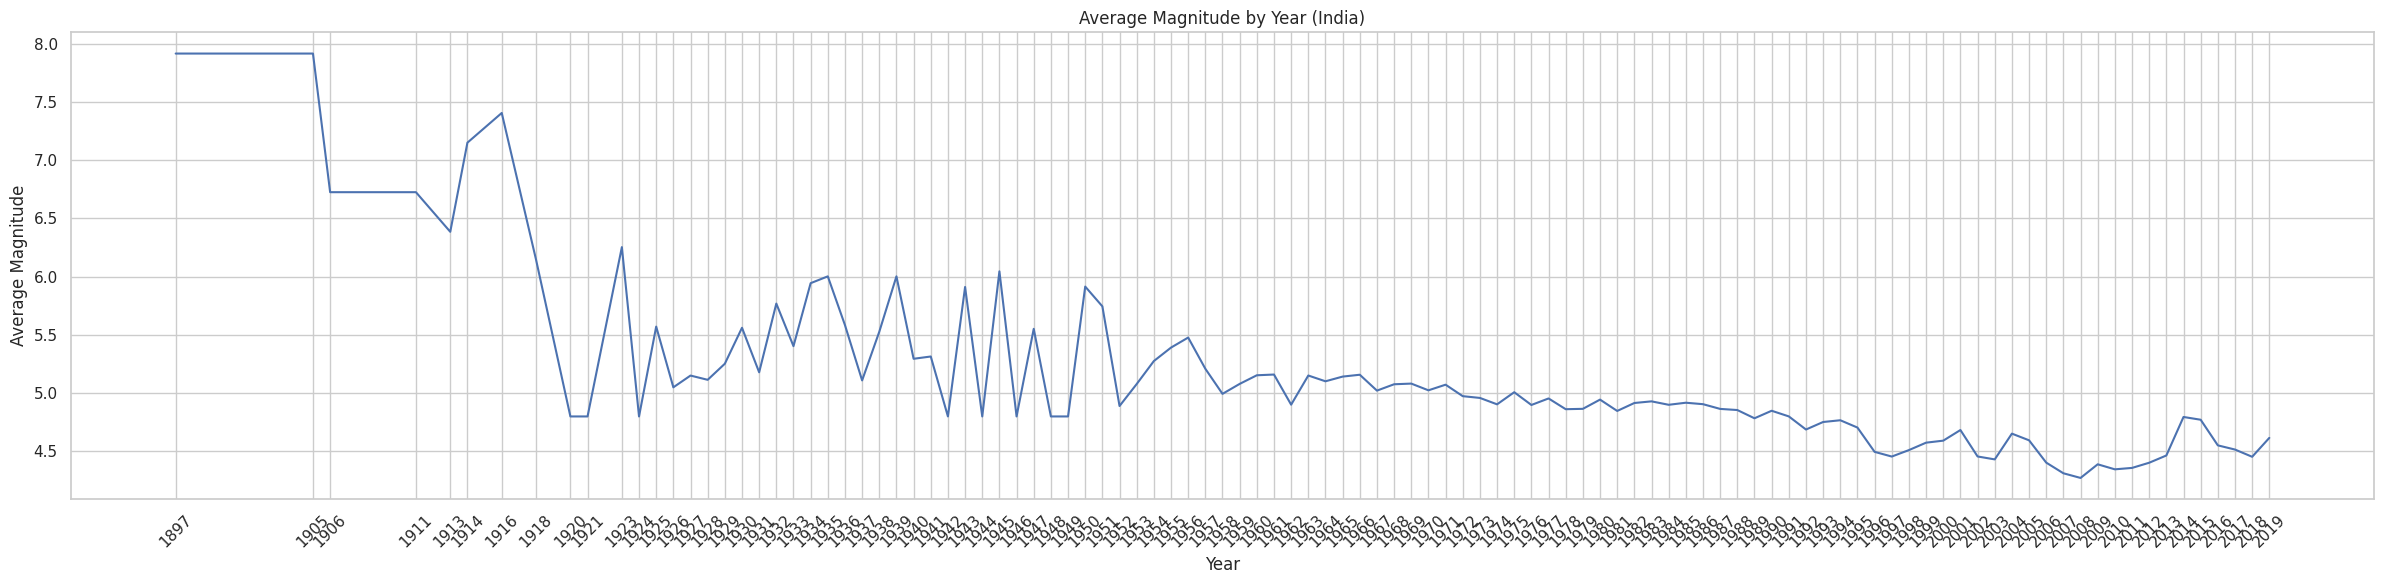

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Detect magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' and 'year' columns exist
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'year' not in df_india.columns:
        df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ 'time' column is missing. Cannot extract 'year'.")

# ✅ Plot 1: Total Earthquakes per Year
if 'year' in df_india.columns:
    yearly_counts = df_india.groupby('year').size()

    plt.figure(figsize=(24, 6))
    yearly_counts.plot(kind='bar', color='lightgreen')
    plt.title('Total Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'year' column is missing. Cannot plot total earthquakes per year.")

# ✅ Plot 2: Average Magnitude by Year
if 'year' in df_india.columns and mag_col:
    avg_mag_by_year = df_india.groupby('year')[mag_col].mean().reset_index()

    plt.figure(figsize=(24, 6))
    sns.lineplot(x='year', y=mag_col, data=avg_mag_by_year)
    plt.title('Average Magnitude by Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Average Magnitude')
    plt.xticks(avg_mag_by_year['year'], rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot average magnitude — missing either 'year' or valid magnitude column.")

In [19]:
# Ensure 'year' column is present and numeric
df_india['year'] = pd.to_datetime(df_india['time']).dt.year

# Filter for years >= 1950
df_since_1950 = df_india[df_india['year'] >= 1950]

# Group by year and count earthquakes
quakes_per_year = df_since_1950.groupby('year').size()

# Calculate the average
average_earthquakes = quakes_per_year.mean()
print(f"🔢 Average earthquakes per year since 1950: {average_earthquakes:.2f}")

🔢 Average earthquakes per year since 1950: 232.91


✅ Descriptive Statistics for Selected Columns:
           DEPTH_KM            MW         MAGMB        HubDist  FaultDensity
count  16494.000000  16494.000000  16494.000000   16494.000000   2422.000000
mean      37.737401      4.640754      4.321838  106881.384731      4.285350
std       33.131730      0.443555      0.557117   89227.313196      3.949411
min        0.000000      3.200000      2.900000     368.678227      0.000004
25%       15.000000      4.345000      3.900000   42717.407100      0.850582
50%       33.000000      4.685000      4.300000   82103.783475      2.614245
75%       43.790000      4.800000      4.800000  144111.611575      7.966164
max      482.000000      8.680000      9.000000  551179.926000     13.100919
----------------------------------------
✅ Missing Values Count:
DEPTH_KM            0
MW                  0
MAGMB               0
HubDist             0
FaultDensity    14072
dtype: int64
----------------------------------------
✅ Distribution Plots:


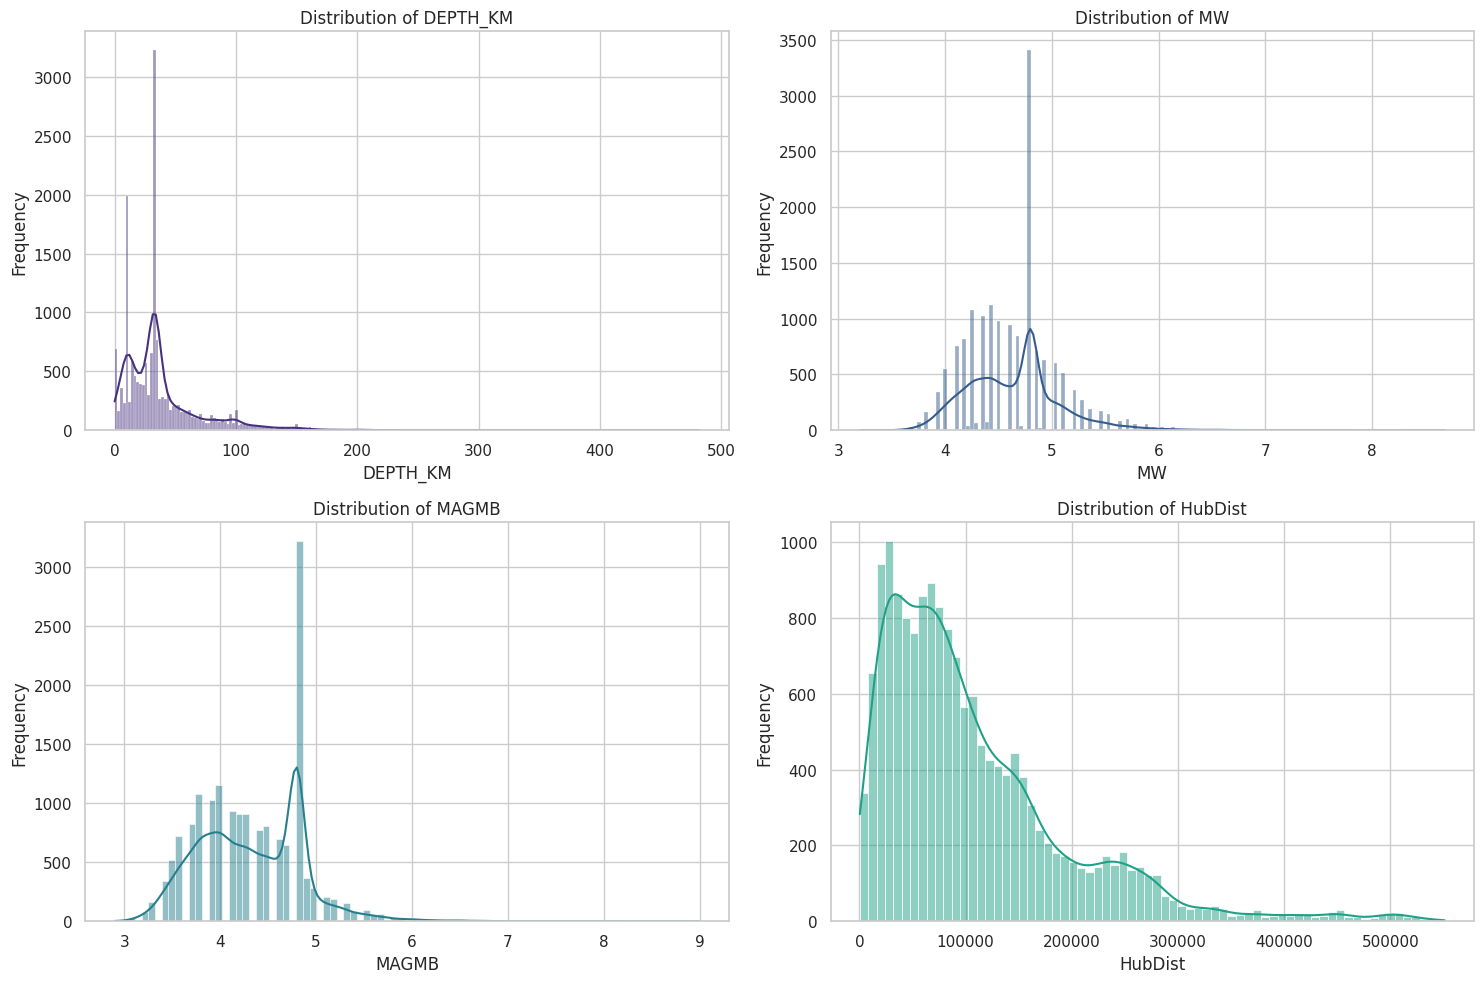

----------------------------------------
✅ Boxplots:


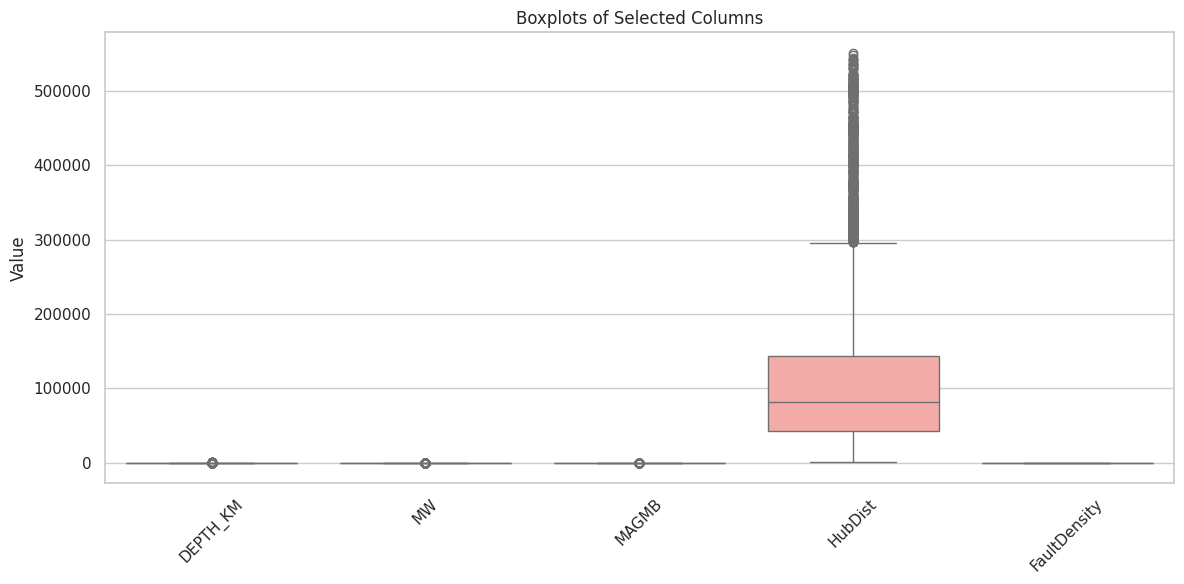

----------------------------------------
✅ Correlation Matrix:


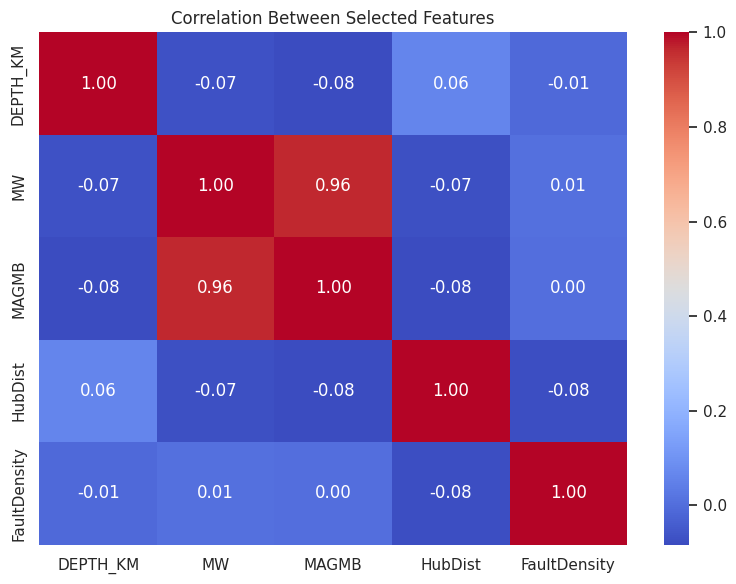

----------------------------------------
✅ Scatter Plots Against Magnitude:


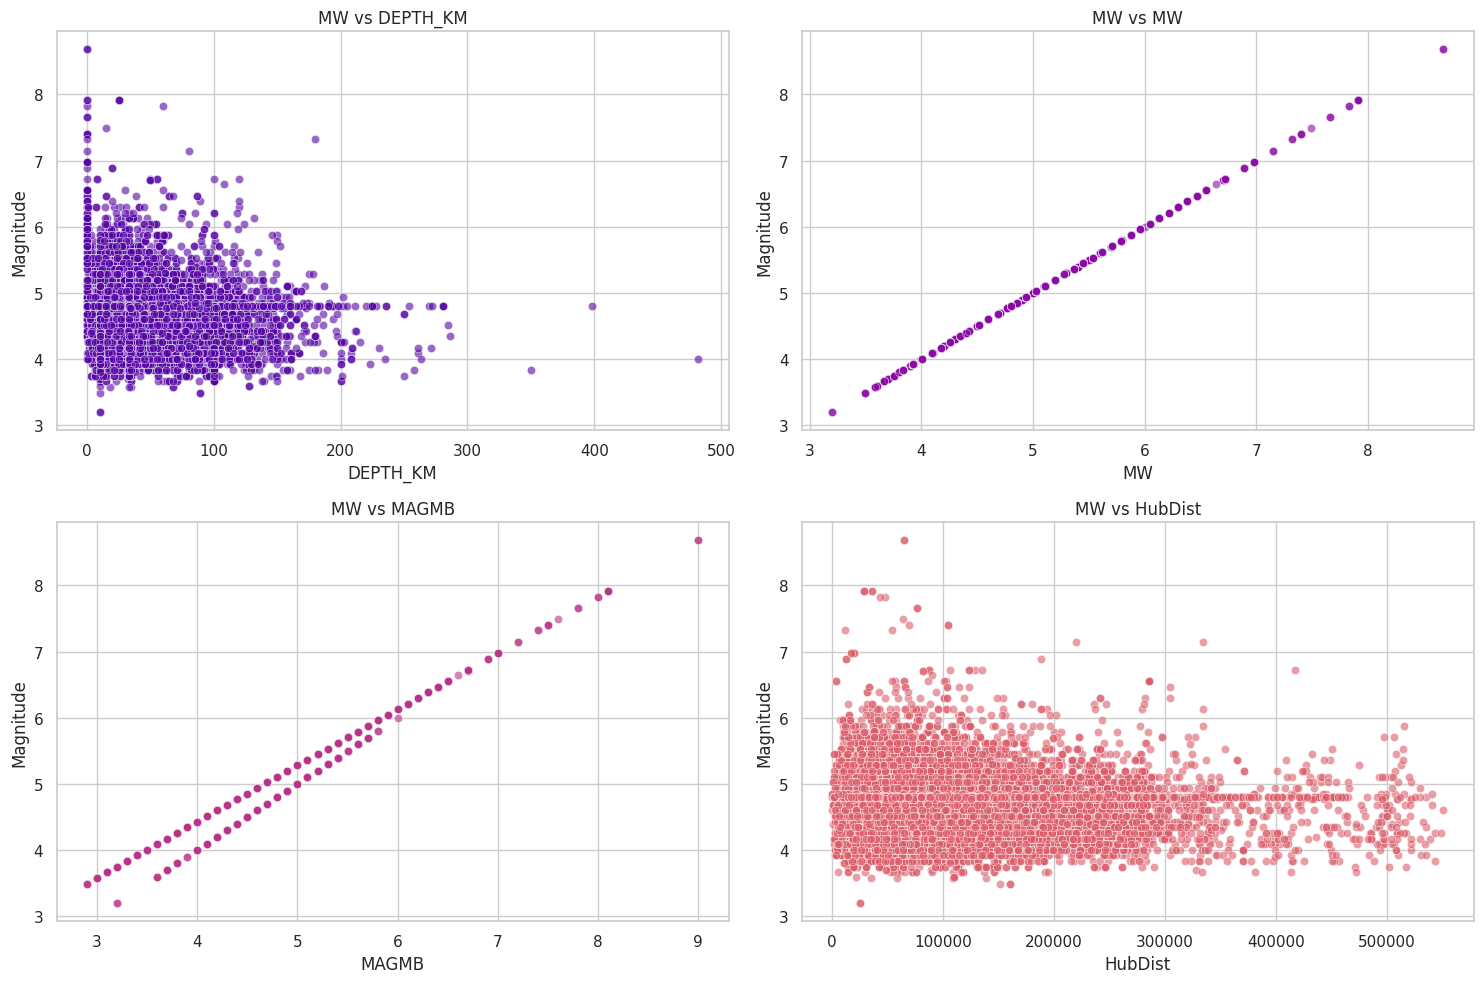

----------------------------------------
✅ Violin Plots by Risk Level:


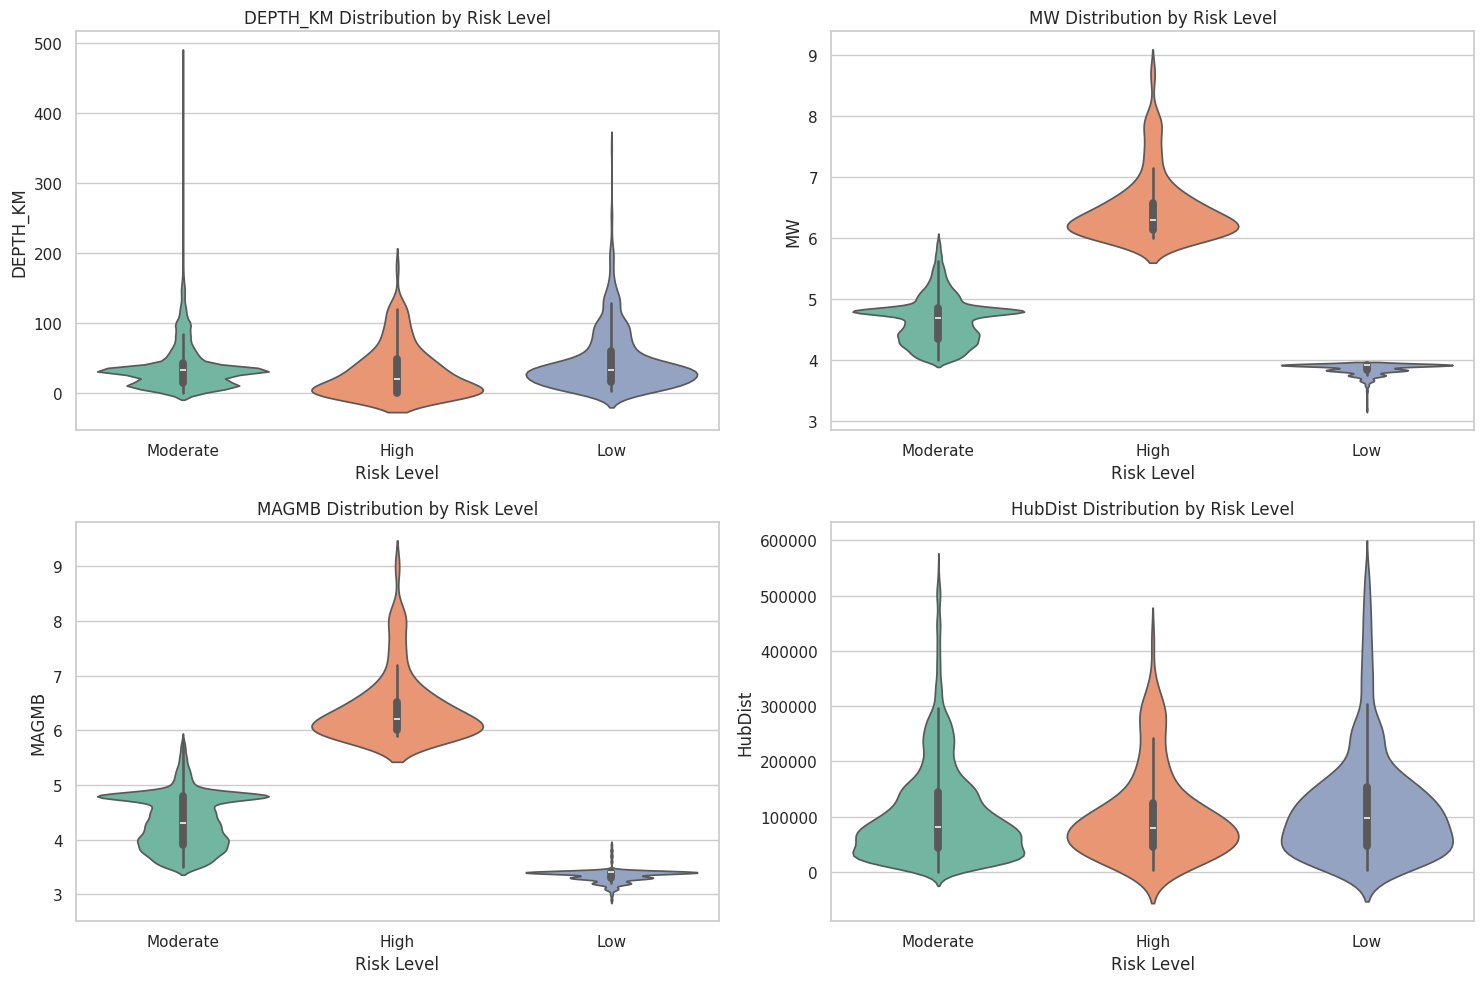

----------------------------------------


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Set style
sns.set(style="whitegrid")

# ✅ Define fallback columns
magnitude_cols = ['mag', 'MW', 'MAGMB']
global_analysis_cols = ['nst', 'gap', 'dmin', 'rms']
india_analysis_cols = ['DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Detect available magnitude column
mag_col = next((col for col in magnitude_cols if col in df_india.columns), None)

# ✅ Detect available analysis columns based on dataset
analysis_cols = [col for col in global_analysis_cols + india_analysis_cols if col in df_india.columns]

# ✅ Create 'risk_level' if not already present
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'
    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)

# ✅ Proceed only if we have at least 1 numeric analysis column
if analysis_cols:
    print("✅ Descriptive Statistics for Selected Columns:")
    print(df_india[analysis_cols].describe())
    print("-" * 40)

    print("✅ Missing Values Count:")
    print(df_india[analysis_cols].isnull().sum())
    print("-" * 40)

    # 📊 Distribution Plots
    print("✅ Distribution Plots:")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(analysis_cols[:4]):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df_india[col], kde=True, color=sns.color_palette('viridis')[i])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 📦 Boxplots
    print("✅ Boxplots:")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_india[analysis_cols], palette='pastel')
    plt.title('Boxplots of Selected Columns')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔗 Correlation Matrix
    print("✅ Correlation Matrix:")
    plt.figure(figsize=(8, 6))
    corr = df_india[analysis_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Features')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔁 Scatter Plots with Magnitude
    if mag_col:
        print("✅ Scatter Plots Against Magnitude:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.scatterplot(data=df_india, x=col, y=mag_col, alpha=0.6, color=sns.color_palette('plasma')[i])
            plt.title(f'{mag_col} vs {col}')
            plt.xlabel(col)
            plt.ylabel('Magnitude')
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ Magnitude column not found — skipping scatter plots.")

    # 🎻 Violin Plots by Risk Level
    if 'risk_level' in df_india.columns:
        print("✅ Violin Plots by Risk Level:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.violinplot(x='risk_level', y=col, data=df_india,
                           palette='Set2', hue='risk_level', legend=False)
            plt.title(f'{col} Distribution by Risk Level')
            plt.xlabel('Risk Level')
            plt.ylabel(col)
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ 'risk_level' not available — skipping violin plots.")

else:
    print("⚠️ No valid numeric analysis columns found in the dataset.")

In [21]:
# 🔁 All candidate columns (global + India-specific)
all_possible_cols = ['nst', 'gap', 'dmin', 'rms', 'DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Filter columns that exist in the dataset
columns_to_impute = [col for col in all_possible_cols if col in df_india.columns]

# ✅ Impute missing values using mean
for col in columns_to_impute:
    mean_val = df_india[col].mean()
    df_india[col] = df_india[col].fillna(mean_val)

# ✅ Show verification of imputation
print("✅ Missing values after mean imputation:")
print(df_india[columns_to_impute].isnull().sum())

✅ Missing values after mean imputation:
DEPTH_KM        0
MW              0
MAGMB           0
HubDist         0
FaultDensity    0
dtype: int64


In [22]:
df_india.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [23]:
# Define possible NA-prone columns (global + India-specific)
global_na_cols = ['horizontalError', 'depthError', 'magError', 'magNst']
india_na_cols = ['HubDist', 'FaultDensity', 'MW', 'MAGMB']

# Combine and filter only columns that exist in the DataFrame
columns_to_handle_na = [col for col in (global_na_cols + india_na_cols) if col in df_india.columns]

# Impute missing values using median for each valid column
for col in columns_to_handle_na:
    if df_india[col].isnull().any():
        median_val = df_india[col].median()
        df_india[col] = df_india[col].fillna(median_val)
        print(f"✅ Imputed missing values in '{col}' with median: {median_val:.3f}")
    else:
        print(f"✔️ No missing values in '{col}'")

# Summary of missing values
print("\n✅ Missing values after imputation in key columns:")
print(df_india[columns_to_handle_na].isnull().sum())

print("\n🔍 Total missing values per column (entire DataFrame):")
print(df_india.isnull().sum()[df_india.isnull().sum() > 0])  # Only show columns with NA

✔️ No missing values in 'HubDist'
✔️ No missing values in 'FaultDensity'
✔️ No missing values in 'MW'
✔️ No missing values in 'MAGMB'

✅ Missing values after imputation in key columns:
HubDist         0
FaultDensity    0
MW              0
MAGMB           0
dtype: int64

🔍 Total missing values per column (entire DataFrame):
SOURCE        3
HubName    6783
dtype: int64


In [24]:
df_india.head(4)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,...,DEPTH_KM,MW,HubName,HubDist,FaultDensity,time,year_month,year,risk_level,month
0,885385.2550,3047879.287,10403,ISC,1991,11,20,12,11,3,...,69.0,4.80,NaN,104658.11830,4.28535,1991-11-20 12:11:03,1991-11,1991,Moderate,11
1,867510.1211,3036551.478,38917,NEIC,2015,5,27,7,30,58,...,10.0,4.77,NaN,87938.60714,4.28535,2015-05-27 07:30:58,2015-05,2015,Moderate,5
2,862566.0542,3027824.935,38916,NEIC,2015,5,27,7,30,41,...,10.0,4.43,NaN,78239.09747,4.28535,2015-05-27 07:30:41,2015-05,2015,Moderate,5
3,826054.0393,3046155.615,19677,ISC,2000,6,8,0,18,4,...,33.0,4.60,NaN,95748.16790,4.28535,2000-06-08 00:18:04,2000-06,2000,Moderate,6


In [25]:
df_india['time_numeric'] = df_india['time'].astype('int64') // 10**9

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

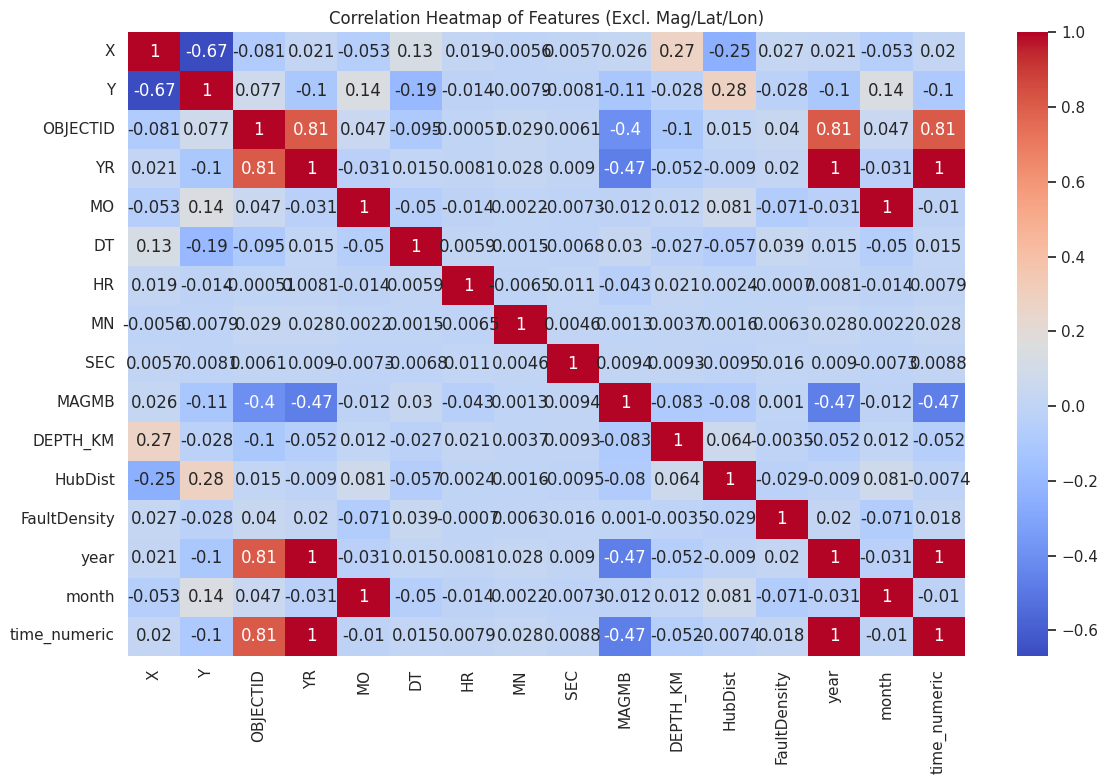


✅ Variance Inflation Factor (VIF) Table:
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471
2       OBJECTID   3.291825
1              Y   2.177541
0              X   2.104519
9          MAGMB   1.356937
10      DEPTH_KM   1.176027
11       HubDist   1.117465
5             DT   1.064039
12  FaultDensity   1.011400
6             HR   1.003090
7             MN   1.001606
8            SEC   1.001012

⚠️ Features with high multicollinearity (VIF > 5):
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# ✅ Define common magnitude and location columns
mag_cols = ['mag', 'MW', 'MAGMB']
lat_cols = ['latitude', 'LAT']
lon_cols = ['longitude', 'LONG_']

# ✅ Get actual column names in current dataset
mag_col = next((col for col in mag_cols if col in df_india.columns), None)
lat_col = next((col for col in lat_cols if col in df_india.columns), None)
lon_col = next((col for col in lon_cols if col in df_india.columns), None)

# ✅ Select only numeric columns
numeric_features = df_india.select_dtypes(include=[np.number])

# ✅ Drop target-like or spatial variables if they exist
drop_cols = [col for col in [lat_col, lon_col, mag_col] if col in numeric_features.columns]
numeric_features = numeric_features.drop(columns=drop_cols, errors='ignore')

# ✅ Drop columns with 0 variance or constant values
numeric_features = numeric_features.loc[:, numeric_features.nunique() > 1]

# ✅ Drop rows with NA for VIF safety
numeric_features = numeric_features.dropna()

# 🔍 Check if at least 2 columns remain
if numeric_features.shape[1] < 2:
    print("⚠️ Not enough valid numeric features for multicollinearity check.")
else:
    # === Correlation Heatmap ===
    corr_matrix = numeric_features.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Features (Excl. Mag/Lat/Lon)')
    plt.tight_layout()
    plt.show()

    # === VIF Calculation ===
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_features.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

    print("\n✅ Variance Inflation Factor (VIF) Table:")
    print(vif_data.sort_values(by='VIF', ascending=False))

    # Optional action
    high_vif = vif_data[vif_data["VIF"] > 5]
    if not high_vif.empty:
        print("\n⚠️ Features with high multicollinearity (VIF > 5):")
        print(high_vif)
    else:
        print("\n✅ No multicollinearity issues detected (VIF ≤ 5).")

In [28]:
# === Dimensionality Reduction / Regularization Based on VIF ===

# Assume `vif_data` has been computed as shown earlier
# Get features with VIF > 5
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Print them clearly
if high_vif:
    print("⚠️ High VIF features (multicollinearity suspected):")
    for feature in high_vif:
        print(f" - {feature} (VIF = {vif_data[vif_data['feature'] == feature]['VIF'].values[0]:.2f})")
else:
    print("✅ No high VIF features found (VIF ≤ 5)")

# Optional: Drop high-VIF features from dataset for further modeling
df_reduced = df_india.drop(columns=high_vif, errors='ignore')
print(f"\n✅ New shape after dropping high VIF features: {df_reduced.shape}")


⚠️ High VIF features (multicollinearity suspected):
 - YR (VIF = inf)
 - MO (VIF = inf)
 - year (VIF = inf)
 - month (VIF = inf)
 - time_numeric (VIF = 17.73)

✅ New shape after dropping high VIF features: (16494, 19)


In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import pytz
import joblib

# === Step 1: Calculate VIF ===
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

numeric_cols = df_india.select_dtypes(include=np.number).columns.tolist()
vif_data = calculate_vif(df_india, numeric_cols)
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Identify target columns
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)
target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
print(f"✅ Using target columns: {target_cols}")

# Separate features to reduce vs low-VIF features
features_to_reduce = [col for col in numeric_cols if col in high_vif and col not in target_cols]
low_vif_features = [col for col in ['time_numeric', 'HubDist', 'FaultDensity'] if col in df_india.columns]

# === Step 2: PCA ===
if features_to_reduce:
    print(f"\nApplying PCA on: {features_to_reduce}")
    scaler_pca = StandardScaler()
    scaled_high_vif = scaler_pca.fit_transform(df_india[features_to_reduce])
    pca = PCA(n_components=0.95)
    pca_features = pca.fit_transform(scaled_high_vif)

    pca_df = pd.DataFrame(pca_features,
                          columns=[f'pc_{i+1}' for i in range(pca_features.shape[1])],
                          index=df_india.index)

    df_processed = pd.concat([pca_df, df_india[low_vif_features + target_cols]], axis=1)
    feature_cols = pca_df.columns.tolist() + low_vif_features
else:
    print("No PCA applied. Using time_numeric + HubDist + FaultDensity only.")
    df_processed = df_india[low_vif_features + target_cols]
    feature_cols = low_vif_features

# Drop missing
df_processed.dropna(subset=feature_cols + target_cols, inplace=True)

# === Step 3: Split & Scale ===
X = df_processed[feature_cols]
y = df_processed[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

best_models = {}

# === Step 4: Linear Regression ===
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
best_models['Linear Regression'] = lr_model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# === Step 5: SVR ===
print("\nTraining SVR Models...")
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale'], 'kernel': ['rbf']}
for i, target in enumerate(target_cols):
    svr = SVR()
    search = RandomizedSearchCV(svr, param_grid_svr, cv=3, n_iter=10, random_state=42, n_jobs=-1)
    search.fit(X_train_scaled, y_train_scaled[:, i])
    best_models[f'SVR_{target}'] = search.best_estimator_
    joblib.dump(search.best_estimator_, f'svr_model_{target}.pkl')

# === Step 6: Random Forest ===
print("\nTraining Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=3, n_iter=10, random_state=42, n_jobs=-1)
search_rf.fit(X_train_scaled, y_train)
best_models['Random Forest'] = search_rf.best_estimator_
joblib.dump(search_rf.best_estimator_, 'random_forest_model.pkl')

# === Step 7: Real-time Prediction ===
print("\nPerforming Real-time Prediction...")

ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)
time_numeric_now = now.timestamp()

# Base input
input_dict = {
    'time_numeric': time_numeric_now,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# Safe real-time input for PCA + rest
if features_to_reduce:
    # Fill full feature set with zeros
    real_time_input_all = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    # Set time_numeric
    if 'time_numeric' in real_time_input_all.columns:
        real_time_input_all['time_numeric'] = time_numeric_now

    # PCA transform
    reduced_scaled = scaler_pca.transform(real_time_input_all)
    reduced_pca = pca.transform(reduced_scaled)
    pca_input_df = pd.DataFrame(reduced_pca, columns=[f'pc_{i+1}' for i in range(reduced_pca.shape[1])])

    # Add low-VIF features
    other_input_df = pd.DataFrame([input_dict])[low_vif_features]
    full_input = pd.concat([pca_input_df, other_input_df], axis=1)
else:
    full_input = pd.DataFrame([input_dict])[feature_cols]

# Final scaling
full_input_scaled = scaler_X.transform(full_input)

# === Step 8: Predict ===
pred_df = pd.DataFrame(index=[now])

# Linear Regression
lr_pred = best_models['Linear Regression'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'LR_{col}'] = lr_pred[0, i]

# SVR
for i, col in enumerate(target_cols):
    svr = best_models[f'SVR_{col}']
    pred_scaled = svr.predict(full_input_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (1, 1))
    dummy[0, i] = pred_scaled
    pred_unscaled = scaler_y.inverse_transform(dummy)
    pred_df[f'SVR_{col}'] = pred_unscaled[0, i]

# Random Forest
rf_pred = best_models['Random Forest'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'RF_{col}'] = rf_pred[0, i]

# === Save + Display ===
print("\n📌 Real-Time Earthquake Prediction:")
print(pred_df)

pred_df.to_csv('real_time_earthquake_predictions.csv')
print("\n✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'")

✅ Using target columns: ['LAT', 'LONG_', 'MAGMB']

Applying PCA on: ['X', 'Y', 'YR', 'MO', 'MW', 'year', 'month', 'time_numeric']

Training Linear Regression...

Training SVR Models...

Training Random Forest...

Performing Real-time Prediction...

📌 Real-Time Earthquake Prediction:
                                        LR_LAT      LR_LONG_   LR_MAGMB  \
2025-07-07 02:16:52.220800+05:30  12507.778946  12564.171728  98.950557   

                                    SVR_LAT  SVR_LONG_  SVR_MAGMB     RF_LAT  \
2025-07-07 02:16:52.220800+05:30  23.988838  83.547051   5.074192  24.425821   

                                   RF_LONG_  RF_MAGMB  
2025-07-07 02:16:52.220800+05:30  87.027139     4.365  

✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'


In [31]:
# prompt: Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# Use the scaled test data (X_test_scaled) for making predictions
lr_preds_test = best_models['Linear Regression'].predict(X_test_scaled)

# Calculate SVR predictions for the test set
svr_predictions_test = pd.DataFrame(index=X_test.index)
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    pred_scaled = svr_model.predict(X_test_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (len(pred_scaled), 1))
    dummy[:, i] = pred_scaled.ravel()
    pred_unscaled = scaler_y.inverse_transform(dummy)
    svr_predictions_test[target_col] = pred_unscaled[:, i]


rf_preds_test = best_models['Random Forest'].predict(X_test_scaled)

# Create a DataFrame to display the test data (time feature) and predictions
# Since 'time_numeric' was used as a feature (potentially transformed by PCA),
# we need to access the original 'time' values from the test set index
test_data_predictions = pd.DataFrame(index=X_test.index)

# Add the original time values from the test set index
test_data_predictions['Original_Time'] = df_india.loc[X_test.index, 'time']

# Add the scaled feature columns used for prediction
for i, col in enumerate(feature_cols):
    test_data_predictions[f'Scaled_{col}'] = X_test_scaled[:, i]


# Add the predictions for each model and target variable
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'Actual_{target_col}'] = y_test[target_col]
    test_data_predictions[f'LR_Predicted_{target_col}'] = lr_preds_test[:, i]
    test_data_predictions[f'SVR_Predicted_{target_col}'] = svr_predictions_test[target_col]
    test_data_predictions[f'RF_Predicted_{target_col}'] = rf_preds_test[:, i]

print("\nTest Data (Time Feature) and Predictions:")
display(test_data_predictions.head())

# Optional: Save the test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions.csv')
print("\nTest data and predictions saved to 'test_data_predictions.csv'")


Test Data (Time Feature) and Predictions:


,Original_Time,Scaled_pc_1,Scaled_pc_2,Scaled_pc_3,Scaled_pc_4,Scaled_time_numeric,Scaled_HubDist,Scaled_FaultDensity,Actual_LAT,LR_Predicted_LAT,SVR_Predicted_LAT,RF_Predicted_LAT,Actual_LONG_,LR_Predicted_LONG_,SVR_Predicted_LONG_,RF_Predicted_LONG_,Actual_MAGMB,LR_Predicted_MAGMB,SVR_Predicted_MAGMB,RF_Predicted_MAGMB
3016,2005-01-27 21:00:41,0.293223,-1.848061,0.837517,1.537992,0.446587,0.747453,-0.001882,9.710300,9.816599,9.498212,8.633420,93.541300,93.796923,93.034312,93.435734,5.0,5.054021,4.970462,4.834
9913,2014-11-17 01:25:28,0.841906,1.555021,-0.306652,1.539049,1.117015,0.898194,-0.001882,29.465300,29.861905,30.184811,33.121134,70.116300,70.008461,70.593681,73.843070,4.4,4.489641,4.495285,4.399
11910,1972-10-12 01:10:32,-1.763786,1.233673,-0.687289,-0.391293,-1.762311,1.802884,-0.001882,35.759998,35.834555,35.681529,35.605700,72.980003,73.456903,73.041689,73.211900,4.8,4.549169,4.766292,4.777
6974,1998-02-12 02:40:27,0.049974,-0.991790,-0.500476,-0.206167,-0.029387,-0.547902,-0.001882,26.600000,26.351742,26.681057,26.428689,87.910004,87.560157,88.132174,86.771571,4.2,4.272663,4.321700,4.197
15398,1970-07-28 15:45:25,-1.815188,0.317310,-0.699647,-0.327965,-1.913317,-0.291166,-0.001882,23.100000,23.705825,23.360878,32.623199,69.300003,68.878109,69.588620,76.181299,4.8,4.617016,4.744046,4.693



Test data and predictions saved to 'test_data_predictions.csv'


In [32]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime
import pytz
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor


# --- Step 1: Identify Targets & VIF ---
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)
target_cols = [col for col in [lat_col, lon_col, mag_col] if col]

numeric_cols = df_india.select_dtypes(include=np.number).columns.tolist()

def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

vif_df = calculate_vif(df_india, numeric_cols)
high_vif = vif_df[vif_df['VIF'] > 5]['feature'].tolist()

# --- Step 2: PCA Reduction (if needed) ---
protected_cols = ['time_numeric', 'HubDist', 'FaultDensity']
features_to_reduce = [col for col in numeric_cols if col in high_vif and col not in target_cols and col not in protected_cols]
low_vif_features = [f for f in ['time_numeric', 'HubDist', 'FaultDensity'] if f in df_india.columns]

if features_to_reduce:
    scaler_pca = StandardScaler()
    scaled = scaler_pca.fit_transform(df_india[features_to_reduce])
    pca = PCA(n_components=0.95)
    pca_features = pca.fit_transform(scaled)
    pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])], index=df_india.index)
    df_processed = pd.concat([df_india.drop(columns=features_to_reduce), pca_df], axis=1)
    feature_cols = pca_df.columns.tolist() + low_vif_features
else:
    df_processed = df_india.copy()
    feature_cols = low_vif_features

# --- Step 3: Drop missing values, Split & Scale ---
df_processed.dropna(subset=feature_cols + target_cols, inplace=True)

X = df_processed[feature_cols]
y = df_processed[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

best_models = {}

# --- Step 4: Linear Regression ---
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
best_models['Linear Regression'] = lr
joblib.dump(lr, 'linear_regression_model.pkl')

# --- Step 5: SVR ---
print("Training SVR Models...")
param_grid_svr = {'C': [0.1, 1, 10], 'gamma': ['scale'], 'kernel': ['rbf']}
for i, col in enumerate(target_cols):
    svr = SVR()
    rs = RandomizedSearchCV(svr, param_grid_svr, cv=3, n_iter=5, random_state=42, n_jobs=-1)
    rs.fit(X_train_scaled, y_train_scaled[:, i])
    best_models[f'SVR_{col}'] = rs.best_estimator_
    joblib.dump(rs.best_estimator_, f'svr_model_{col}.pkl')

# --- Step 6: Random Forest ---
print("Training Random Forest...")
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, None]}
rf = RandomForestRegressor(random_state=42)
rs_rf = RandomizedSearchCV(rf, param_grid_rf, cv=3, n_iter=4, random_state=42, n_jobs=-1)
rs_rf.fit(X_train_scaled, y_train)
best_models['Random Forest'] = rs_rf.best_estimator_
joblib.dump(rs_rf.best_estimator_, 'random_forest_model.pkl')

# --- Step 7: Real-time Prediction ---
print("Generating Real-Time Prediction...")
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

input_dict = {
    'time_numeric': current_time_numeric,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

if features_to_reduce:
    dummy_df = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    if 'time_numeric' in dummy_df.columns:
        dummy_df['time_numeric'] = current_time_numeric
    reduced_scaled = scaler_pca.transform(dummy_df)
    pca_input = pca.transform(reduced_scaled)
    pca_input_df = pd.DataFrame(pca_input, columns=[f'PC{i+1}' for i in range(pca_input.shape[1])])
    real_input = pd.concat([pca_input_df, pd.DataFrame([input_dict])[low_vif_features]], axis=1)
else:
    real_input = pd.DataFrame([input_dict])[feature_cols]

real_input_scaled = scaler_X.transform(real_input)

real_time_predictions_df = pd.DataFrame(index=[current_time])
real_time_predictions_df[[f'LR_{col}' for col in target_cols]] = best_models['Linear Regression'].predict(real_input_scaled)

for i, col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{col}']
    pred_scaled = svr_model.predict(real_input_scaled).reshape(1, -1)
    dummy = np.tile(y_train_scaled[0], (1, 1))
    dummy[0, i] = pred_scaled
    inv_pred = scaler_y.inverse_transform(dummy)
    real_time_predictions_df[f'SVR_{col}'] = inv_pred[0, i]

rf_pred = best_models['Random Forest'].predict(real_input_scaled)
real_time_predictions_df[[f'RF_{col}' for col in target_cols]] = rf_pred[0]

real_time_predictions_df.to_csv('real_time_earthquake_predictions.csv')
print("✅ Real-time prediction saved!")

# --- Step 8: Future Prediction on Test Set ---
print("Generating Predictions for Test Set...")
future_input_df = pd.DataFrame({
    'time_numeric': X_test['time_numeric'],
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
})[low_vif_features]

if features_to_reduce:
    dummy_future = pd.DataFrame(0.0, index=X_test.index, columns=features_to_reduce)
    if 'time_numeric' in dummy_future.columns:
        dummy_future['time_numeric'] = X_test['time_numeric'].values
    reduced_scaled = scaler_pca.transform(dummy_future)
    pca_test = pca.transform(reduced_scaled)
    pca_test_df = pd.DataFrame(pca_test, columns=[f'PC{i+1}' for i in range(pca_test.shape[1])], index=X_test.index)
    future_input_df = pd.concat([pca_test_df, future_input_df], axis=1)

future_scaled = scaler_X.transform(future_input_df)
future_predictions_df = pd.DataFrame(index=X_test.index)

# Linear
linear_preds = best_models['Linear Regression'].predict(future_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'LR_{col}'] = linear_preds[:, i]

# SVR
for i, col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{col}']
    pred_scaled = svr_model.predict(future_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (len(pred_scaled), 1))
    dummy[:, i] = pred_scaled.ravel()
    unscaled_preds = scaler_y.inverse_transform(dummy)
    future_predictions_df[f'SVR_{col}'] = unscaled_preds[:, i]

# RF
rf_preds = best_models['Random Forest'].predict(future_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'RF_{col}'] = rf_preds[:, i]

future_predictions_df.to_csv('future_earthquake_predictions.csv')
print("✅ Future predictions saved!")

Training Linear Regression...
Training SVR Models...
Training Random Forest...
Generating Real-Time Prediction...
✅ Real-time prediction saved!
Generating Predictions for Test Set...
✅ Future predictions saved!


In [33]:
# MLP for Earthquake Prediction (Latitude, Longitude, Magnitude)

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from datetime import datetime
import pytz
import os

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Prepare data
input_shape = X_train_scaled.shape[1]
output_shape = y_train_scaled.shape[1]

# Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_mlp_model.keras', monitor='val_mae', save_best_only=True, verbose=1)

def lr_scheduler(epoch, lr):
    return float(lr if epoch < 10 else lr * tf.math.exp(-0.1))

lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)
callbacks_list = [early_stopping, model_checkpoint, lr_schedule]

# Train model
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    callbacks=callbacks_list,
                    verbose=1)

# Load best saved model
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')

# --- Real-time Prediction ---
print("\nPerforming Real-time Prediction using MLP...")

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

input_dict = {
    'time_numeric': current_time_numeric,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# Build real-time input
if features_to_reduce:
    dummy_high_vif_df = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    if 'time_numeric' in features_to_reduce:
        dummy_high_vif_df['time_numeric'] = current_time_numeric

    scaled_high_vif = scaler_pca.transform(dummy_high_vif_df)
    pca_features = pca.transform(scaled_high_vif)
    pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

    low_vif_input_df = pd.DataFrame([input_dict])[['time_numeric', 'HubDist', 'FaultDensity']]
    real_input_df = pd.concat([pca_df, low_vif_input_df[low_vif_features]], axis=1)

else:
    real_input_df = pd.DataFrame([input_dict])[feature_cols]

# Scale input
real_input_scaled = scaler_X.transform(real_input_df)

# Predict
mlp_pred_scaled = best_mlp_model.predict(real_input_scaled, verbose=1)
mlp_pred_original = scaler_y.inverse_transform(mlp_pred_scaled)

# Store results
real_time_predictions_mlp_df = pd.DataFrame(
    data=[mlp_pred_original[0]],
    columns=[f'MLP_{col}' for col in target_cols],
    index=[current_time]
)

print("\nReal-time Predictions (MLP):")
print(real_time_predictions_mlp_df)

real_time_predictions_mlp_df.to_csv('real_time_earthquake_predictions_mlp.csv')
print("\n✅ Real-time MLP predictions saved to 'real_time_earthquake_predictions_mlp.csv'")


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5101 - mae: 0.5638
Epoch 1: val_mae improved from inf to 0.24302, saving model to best_mlp_model.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.5089 - mae: 0.5630 - val_loss: 0.1029 - val_mae: 0.2430 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
147/165 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1716 - mae: 0.3234
Epoch 2: val_mae improved from 0.24302 to 0.21509, saving model to best_mlp_model.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1701 - mae: 0.3220 - val_loss: 0.0823 - val_mae: 0.2151 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
156/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1359 - mae: 0.2856
Epoch 3: val_mae improved from 0.21509 to 0.19665, saving model to best_mlp_mo

In [34]:
# --- Step: MLP Predictions on Test Set ---

# Predict using the trained MLP model
mlp_preds_scaled_test = best_mlp_model.predict(X_test_scaled)
mlp_preds_original_test = scaler_y.inverse_transform(mlp_preds_scaled_test)

# Build base DataFrame with time feature
test_data_predictions = pd.DataFrame({
    'time_numeric': X_test['time_numeric'].values  # assuming time_numeric is part of feature_cols
}, index=X_test.index)

# Add actual values for comparison
for col in target_cols:
    test_data_predictions[f'Actual_{col}'] = y_test[col].values

# Add MLP predictions to the DataFrame
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'MLP_Predicted_{target_col}'] = mlp_preds_original_test[:, i]

# Display top rows
print("\n📘 Test Data (time_numeric) + Actual vs MLP Predictions:")
print(test_data_predictions.head())

# Save to CSV
test_data_predictions.to_csv('test_data_predictions_with_mlp.csv', index=False)
print("\n✅ File saved: 'test_data_predictions_with_mlp.csv'")

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

📘 Test Data (time_numeric) + Actual vs MLP Predictions:
       time_numeric  Actual_LAT  Actual_LONG_  Actual_MAGMB  \
3016     1106859641    9.710300     93.541300           5.0   
9913     1416187528   29.465300     70.116300           4.4   
11910      87700232   35.759998     72.980003           4.8   
6974      887251227   26.600000     87.910004           4.2   
15398      18027925   23.100000     69.300003           4.8   

       MLP_Predicted_LAT  MLP_Predicted_LONG_  MLP_Predicted_MAGMB  
3016           12.708277            93.178307             4.961089  
9913           33.869411            73.973145             4.590351  
11910          35.314625            74.178459             4.668969  
6974           27.175388            87.230515             4.186499  
15398          26.635948            72.368423             4.717334  

✅ File saved: 'test_data_predictions_with_mlp.csv'


In [35]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pytz
import tensorflow as tf

# Latest earthquake timestamp in India dataset
start_time = df_india['time'].max() if not df_india['time'].empty else datetime.now(pytz.timezone('Asia/Kolkata'))

# Parameters
future_years = 100
earthquakes_per_year = 233
total_future_events = future_years * earthquakes_per_year

# Generate future timestamps (random within 100 years)
np.random.seed(42)
days_offsets = np.random.randint(1, 365 * future_years, total_future_events)
seconds_offsets = np.random.randint(0, 86400, total_future_events)

future_timestamps = [start_time + timedelta(days=int(d), seconds=int(s)) for d, s in zip(days_offsets, seconds_offsets)]
future_timestamps = sorted(future_timestamps)  # sort chronologically

# Convert timestamps to Unix time
future_time_numeric = [ts.timestamp() for ts in future_timestamps]

# Prepare prediction input features
if features_to_reduce:
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)
    if 'time_numeric' in features_to_reduce:
        future_input_df['time_numeric'] = future_time_numeric
    for col in features_to_reduce:
        if col != 'time_numeric':
            future_input_df[col] = df_india[col].median() if col in df_india.columns else 0.0
    future_input_df.fillna(future_input_df.median(), inplace=True)

    scaled_input = scaler_pca.transform(future_input_df)
    pca_output = pca.transform(scaled_input)
    pca_df = pd.DataFrame(pca_output, columns=[f'PC{i+1}' for i in range(pca_output.shape[1])])

    future_low_vif = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    })

    future_X = pd.concat([pca_df.reset_index(drop=True), future_low_vif.reset_index(drop=True)], axis=1)
    future_X_scaled = scaler_X.transform(future_X[feature_cols])  # Ensure same column order

else:
    future_X = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    })[feature_cols]
    future_X_scaled = scaler_X.transform(future_X)

# Build empty DataFrame with timestamps
future_predictions_df = pd.DataFrame(index=future_timestamps)
target_cols = [lat_col, lon_col, mag_col]

# --- Linear Regression ---
print("🔹 Predicting with Linear Regression...")
lr_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{col}'] = lr_preds[:, i]

# --- SVR ---
print("🔹 Predicting with SVR...")
for i, col in enumerate(target_cols):
    svr = best_models[f'SVR_{col}']
    svr_pred_scaled = svr.predict(future_X_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (len(svr_pred_scaled), 1))
    dummy[:, i] = svr_pred_scaled.ravel()
    svr_pred_original = scaler_y.inverse_transform(dummy)
    future_predictions_df[f'SVR_Predicted_{col}'] = svr_pred_original[:, i]

# --- Random Forest ---
print("🔹 Predicting with Random Forest...")
rf_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{col}'] = rf_preds[:, i]

# --- MLP Neural Network ---
print("🔹 Predicting with MLP Model...")
mlp_model = tf.keras.models.load_model('best_mlp_model.keras')
mlp_preds_scaled = mlp_model.predict(future_X_scaled, verbose=0)
mlp_preds = scaler_y.inverse_transform(mlp_preds_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'MLP_Predicted_{col}'] = mlp_preds[:, i]

# Save results
csv_path = 'future_earthquake_predictions_100years.csv'
future_predictions_df.to_csv(csv_path)
print(f"\n✅ Future predictions saved to: {csv_path}")

# Show a sample of results
print("\n🔍 Sample Future Earthquake Predictions:")
print(future_predictions_df.sample(4))

🔹 Predicting with Linear Regression...
🔹 Predicting with SVR...
🔹 Predicting with Random Forest...
🔹 Predicting with MLP Model...

✅ Future predictions saved to: future_earthquake_predictions_100years.csv

🔍 Sample Future Earthquake Predictions:
                     LR_Predicted_LAT  LR_Predicted_LONG_  LR_Predicted_MAGMB  \
2053-04-18 18:53:27        307.411654          362.442021            6.774472   
2082-02-28 21:32:33        470.122878          524.200613            8.164226   
2035-12-18 09:26:50        209.699619          265.302065            5.939891   
2081-08-31 19:10:10        467.327990          521.422088            8.140354   

                     SVR_Predicted_LAT  SVR_Predicted_LONG_  \
2053-04-18 18:53:27          96.936529           150.691263   
2082-02-28 21:32:33          35.317890            94.730175   
2035-12-18 09:26:50         135.642077           185.287280   
2081-08-31 19:10:10          35.849759            95.215814   

                     SVR_Predict

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from datetime import datetime, timedelta
import pytz

# --- Reshape for LSTM ---
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
output_shape = len(target_cols)

# --- Build LSTM Model ---
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Callbacks ---
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint_lstm = ModelCheckpoint('best_lstm_model.keras', monitor='val_mae', save_best_only=True)

def lr_scheduler(epoch, lr):
    return lr if epoch < 10 else float(lr * tf.math.exp(-0.1))

lr_schedule = LearningRateScheduler(lr_scheduler)

# --- Train LSTM ---
print("🔁 Training LSTM model...")
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping_lstm, checkpoint_lstm, lr_schedule],
    verbose=1
)

# --- Load best model ---
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')

# ----------------------------
# ✅ Real-time LSTM Prediction
# ----------------------------
print("🔮 Real-time Prediction using LSTM...")
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)
now_numeric = now.timestamp()

# Ensure correct input shape (matching training)
input_data = {
    'time_numeric': now_numeric,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# Fill in all other feature_cols with default (median or 0.0 if not known)
for col in feature_cols:
    if col not in input_data:
        input_data[col] = df_india[col].median() if col in df_india.columns else 0.0

rt_input_df = pd.DataFrame([input_data])[feature_cols]

# Scale and reshape
final_input = scaler_X.transform(rt_input_df)
final_input_lstm = final_input.reshape((final_input.shape[0], 1, final_input.shape[1]))

# Predict
lstm_rt_pred_scaled = best_lstm_model.predict(final_input_lstm)
lstm_rt_pred_original = scaler_y.inverse_transform(lstm_rt_pred_scaled)

real_time_predictions_lstm_df = pd.DataFrame(
    data=[lstm_rt_pred_original[0]],
    columns=[f'LSTM_{col}' for col in target_cols],
    index=[now]
)

real_time_predictions_lstm_df.to_csv('real_time_earthquake_predictions_lstm.csv')
print("\n✅ Real-time LSTM predictions saved.")
display(real_time_predictions_lstm_df)

# ----------------------------------------------------
# ✅ Predict for 100 Years (Like MLP / RF / SVR / LR)
# ----------------------------------------------------
print("\n📈 Predicting 100 Years with LSTM...")

future_years = 100
earthquakes_per_year = 233
total_future = future_years * earthquakes_per_year

np.random.seed(42)
days = np.random.randint(1, 365 * future_years, total_future)
secs = np.random.randint(0, 86400, total_future)

start = df_india['time'].max() if not df_india['time'].empty else datetime.now(ist)
future_times = sorted([start + timedelta(days=int(d), seconds=int(s)) for d, s in zip(days, secs)])
future_time_numeric = [dt.timestamp() for dt in future_times]

# Future input
if features_to_reduce:
    future_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)
    if 'time_numeric' in features_to_reduce:
        future_df['time_numeric'] = future_time_numeric
    for col in features_to_reduce:
        if col != 'time_numeric' and col in df_india.columns:
            future_df[col] = df_india[col].median()
    scaled_future = scaler_pca.transform(future_df)
    final_pca_future = pca.transform(scaled_future)
    pca_future_df = pd.DataFrame(final_pca_future, columns=[f'PC{i+1}' for i in range(final_pca_future.shape[1])])
    future_df = pd.concat([
        pca_future_df,
        pd.DataFrame({
            'time_numeric': future_time_numeric,
            'HubDist': df_india['HubDist'].median(),
            'FaultDensity': df_india['FaultDensity'].median()
        }, index=range(len(future_time_numeric)))[low_vif_features]
    ], axis=1)
else:
    future_df = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    })
    future_df = future_df[feature_cols]

# Scale and reshape
final_future_scaled = scaler_X.transform(future_df)
final_future_input_lstm = final_future_scaled.reshape((final_future_scaled.shape[0], 1, final_future_scaled.shape[1]))

# Predict
lstm_future_pred_scaled = best_lstm_model.predict(final_future_input_lstm, verbose=0)
lstm_future_pred = scaler_y.inverse_transform(lstm_future_pred_scaled)

# Save
lstm_future_df = pd.DataFrame(lstm_future_pred, columns=[f'LSTM_{col}' for col in target_cols], index=future_times)
lstm_future_df.to_csv('future_earthquake_predictions_lstm.csv')
print("\n✅ 100-year LSTM predictions saved to 'future_earthquake_predictions_lstm.csv'.")
display(lstm_future_df.sample(5))

🔁 Training LSTM model...
Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.6944 - mae: 0.6931 - val_loss: 0.1103 - val_mae: 0.2569 - learning_rate: 0.0010
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1359 - mae: 0.2860 - val_loss: 0.0823 - val_mae: 0.2104 - learning_rate: 0.0010
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1099 - mae: 0.2530 - val_loss: 0.0684 - val_mae: 0.1857 - learning_rate: 0.0010
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0929 - mae: 0.2308 - val_loss: 0.0606 - val_mae: 0.1707 - learning_rate: 0.0010
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0856 - mae: 0.2190 - val_loss: 0.0558 - val_mae: 0.1622 - learning_rate: 0.0010
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0781 - mae: 0.2077 - val_loss: 0.0531 - val_mae: 0.1574 - learning_rate: 0.0010
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0752 - mae: 0.2019 - val_loss: 0.0517 - val_mae: 0.1

,LSTM_LAT,LSTM_LONG_,LSTM_MAGMB
2025-07-07 02:37:56.964038+05:30,29.777061,93.907204,4.259456



📈 Predicting 100 Years with LSTM...

✅ 100-year LSTM predictions saved to 'future_earthquake_predictions_lstm.csv'.


,LSTM_LAT,LSTM_LONG_,LSTM_MAGMB
2053-04-18 18:53:27,32.963936,92.390633,4.585441
2082-02-28 21:32:33,35.181969,91.086197,4.800643
2035-12-18 09:26:50,30.972429,92.380836,4.446257
2081-08-31 19:10:10,35.140438,91.110580,4.796984
2045-06-08 02:43:37,32.285587,92.554085,4.529731


In [43]:
#Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# LSTM Predictions on Test Set
lstm_preds_scaled_test = best_lstm_model.predict(X_test_lstm)
lstm_preds_original_test = scaler_y.inverse_transform(lstm_preds_scaled_test)

# Add LSTM predictions to the test_data_predictions DataFrame
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'LSTM_Predicted_{target_col}'] = lstm_preds_original_test[:, i]

print("\nTest Data (Time Feature) and Predictions (including MLP and LSTM):")
display(test_data_predictions.head())

# Optional: Save the final test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions_final_LSTM.csv')
print("\nFinal test data and predictions saved to 'test_data_predictions_final_LSTM.csv'")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Data (Time Feature) and Predictions (including MLP and LSTM):


,time_numeric,Actual_LAT,Actual_LONG_,Actual_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB,LSTM_Predicted_LAT,LSTM_Predicted_LONG_,LSTM_Predicted_MAGMB
3016,1106859641,9.710300,93.541300,5.0,12.708277,93.178307,4.961089,9.536935,93.753700,4.996471
9913,1416187528,29.465300,70.116300,4.4,33.869411,73.973145,4.590351,34.501076,74.591736,4.606121
11910,87700232,35.759998,72.980003,4.8,35.314625,74.178459,4.668969,34.946110,73.720360,4.697618
6974,887251227,26.600000,87.910004,4.2,27.175388,87.230515,4.186499,25.333609,87.362007,4.192755
15398,18027925,23.100000,69.300003,4.8,26.635948,72.368423,4.717334,32.099613,75.987892,4.729206



Final test data and predictions saved to 'test_data_predictions_final_LSTM.csv'


In [48]:
import random

# 1. Generate future timestamps
future_years = 100
samples = 233 * future_years
start_time = df_india['time'].max() if not df_india['time'].empty else datetime.now(pytz.timezone('Asia/Kolkata'))

future_timestamps = [
    start_time + timedelta(days=int(d), seconds=random.randint(0, 86399))
    for d in np.linspace(1, 365 * future_years, num=samples)
]
future_time_numeric = [ts.timestamp() for ts in future_timestamps]

# 2. Prepare future input dataframe
if features_to_reduce:
    # Create and fill PCA features
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)
    if 'time_numeric' in future_input_df.columns:
        future_input_df['time_numeric'] = future_time_numeric
    for col in features_to_reduce:
        if col != 'time_numeric':
            future_input_df[col] = df_india[col].median() if col in df_india.columns else 0.0

    # Apply PCA
    scaled_pca_input = scaler_pca.transform(future_input_df)
    reduced_pca_features = pca.transform(scaled_pca_input)
    pca_feature_names = [f'PC{i+1}' for i in range(reduced_pca_features.shape[1])]
    pca_df = pd.DataFrame(reduced_pca_features, columns=pca_feature_names)

    # Add low-VIF features
    low_vif_data = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    }, index=range(len(future_time_numeric)))[low_vif_features] # Use index based on number of samples

    future_input_final = pd.concat([pca_df, low_vif_data], axis=1)
else:
    future_input_final = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    })[feature_cols] # Select only features_cols directly

# Ensure column order matches training
future_input_final = future_input_final[feature_cols]
future_X_scaled = scaler_X.transform(future_input_final)

# 3. Predict with all models
future_predictions_df = pd.DataFrame(index=future_timestamps)

# --- Linear Regression ---
print("🔹 Linear Regression Prediction...")
lr_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{col}'] = lr_preds[:, i]

# --- SVR ---
print("🔹 SVR Prediction...")
for i, col in enumerate(target_cols):
    svr = best_models[f'SVR_{col}']
    svr_pred_scaled = svr.predict(future_X_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (len(svr_pred_scaled), 1))
    dummy[:, i] = svr_pred_scaled.ravel()
    svr_pred_original = scaler_y.inverse_transform(dummy)
    future_predictions_df[f'SVR_Predicted_{col}'] = svr_pred_original[:, i]

# --- Random Forest ---
print("🔹 Random Forest Prediction...")
rf_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{col}'] = rf_preds[:, i]

# --- MLP ---
print("🔹 MLP Prediction...")
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')
mlp_preds_scaled = best_mlp_model.predict(future_X_scaled, verbose=0)
mlp_preds = scaler_y.inverse_transform(mlp_preds_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'MLP_Predicted_{col}'] = mlp_preds[:, i]

# --- LSTM ---
print("🔹 LSTM Prediction...")
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')
future_X_lstm = future_X_scaled.reshape((future_X_scaled.shape[0], 1, future_X_scaled.shape[1]))
lstm_preds_scaled = best_lstm_model.predict(future_X_lstm, verbose=0)
lstm_preds = scaler_y.inverse_transform(lstm_preds_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'LSTM_Predicted_{col}'] = lstm_preds[:, i]
# 5. Save and show sample
csv_path = "future_earthquake_predictions_all.csv"
future_predictions_df.to_csv(csv_path)
print(f"\n✅ Saved all predictions to '{csv_path}'")
print("\n🔍 Sample of all predictions:")
if not future_predictions_df.empty:
    display(future_predictions_df.sample(5))
else:
    print("⚠️ Prediction DataFrame is empty.")

🔹 Linear Regression Prediction...
🔹 SVR Prediction...
🔹 Random Forest Prediction...
🔹 MLP Prediction...
🔹 LSTM Prediction...

✅ Saved all predictions to 'future_earthquake_predictions_all.csv'

🔍 Sample of all predictions:


,LR_Predicted_LAT,LR_Predicted_LONG_,LR_Predicted_MAGMB,SVR_Predicted_LAT,SVR_Predicted_LONG_,SVR_Predicted_MAGMB,RF_Predicted_LAT,RF_Predicted_LONG_,RF_Predicted_MAGMB,MLP_Predicted_LAT,MLP_Predicted_LONG_,MLP_Predicted_MAGMB,LSTM_Predicted_LAT,LSTM_Predicted_LONG_,LSTM_Predicted_MAGMB
2096-03-25 13:30:19,549.427605,603.041031,8.841586,25.953358,86.170234,5.396620,26.366168,84.179888,4.3845,32.338150,97.681000,5.951574,36.618767,90.417496,4.894442
2031-02-18 19:09:49,182.482156,238.243952,5.707420,137.210014,186.450754,6.198200,26.366168,84.179888,4.3845,32.246376,89.430855,4.910440,30.117786,91.794174,4.407641
2037-05-28 02:00:30,217.827997,273.382852,6.009317,134.096897,183.953234,6.661474,26.366168,84.179888,4.3845,32.257435,90.467468,5.021405,31.199827,92.425713,4.458668
2085-03-29 23:06:23,487.485945,541.462024,8.312528,32.375402,92.042460,5.798972,26.366168,84.179888,4.3845,32.222088,96.452888,5.776438,35.467812,90.937363,4.822384
2047-11-08 06:27:17,276.722967,331.933008,6.512353,112.328091,164.560031,7.152677,26.366168,84.179888,4.3845,32.442173,92.338348,5.173964,32.533649,92.563988,4.547990


In [49]:
import numpy as np
import pandas as pd
import pytz
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ==== Step 1: Identify Columns ====
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)
target_cols = [col for col in [lat_col, lon_col, mag_col] if col]

if len(target_cols) < 3:
    raise ValueError("Required target columns not found (latitude, longitude, magnitude)")

print(f"✅ Target columns used: {target_cols}")

# ==== Step 2: Prepare Features ====
# Choose more features if you want (timestamp + HubDist + FaultDensity, etc.)
input_features = ['timestamp']
if 'HubDist' in df_india.columns:
    input_features.append('HubDist')
if 'FaultDensity' in df_india.columns:
    input_features.append('FaultDensity')

df_lstm = df_india.copy()
df_lstm['timestamp'] = pd.to_datetime(df_lstm['time'], errors='coerce').view('int64') // 10**9
df_lstm.dropna(subset=input_features + target_cols, inplace=True)

# ==== Step 3: Scaling ====
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(df_lstm[input_features])

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df_lstm[target_cols])

# Reshape for LSTM: [samples, time steps = 1, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Step 4: Build Model ====
model_lstm = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2])),
    Dense(32, activation='relu'),
    Dense(3)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

# ==== Step 5: Train ====
print("\n🧠 Training LSTM model...")
history = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# ==== Step 6: Evaluate (Optional) ====
from sklearn.metrics import mean_squared_error

y_pred = model_lstm.predict(X_test)
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_orig, y_pred_orig)
print(f"\n🧪 Test MSE: {mse:.4f}")

# ==== Step 7: Real-Time Prediction ====
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_timestamp = int(current_time.timestamp())

# Build real-time input dict
real_time_input = {
    'timestamp': current_timestamp,
    'HubDist': df_lstm['HubDist'].median() if 'HubDist' in df_lstm.columns else 0.0,
    'FaultDensity': df_lstm['FaultDensity'].median() if 'FaultDensity' in df_lstm.columns else 0.0
}
real_time_df = pd.DataFrame([real_time_input])[input_features]

# Scale and reshape
X_real_time = scaler_X.transform(real_time_df)
X_real_time = X_real_time.reshape((1, 1, X_real_time.shape[1]))

# Predict
prediction_scaled = model_lstm.predict(X_real_time)
prediction_original = scaler_y.inverse_transform(prediction_scaled)

real_time_pred_df = pd.DataFrame(prediction_original, columns=target_cols, index=[current_time])

print("\n📌 Real-time Prediction using LSTM:")
print(real_time_pred_df)

# ==== Step 8: Save Model and Scalers ====
model_lstm.save("lstm_earthquake_model.h5")
import joblib
joblib.dump(scaler_X, "lstm_scaler_X.pkl")
joblib.dump(scaler_y, "lstm_scaler_y.pkl")

✅ Target columns used: ['LAT', 'LONG_', 'MAGMB']


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,587 (76.51 KB)

 Trainable params: 19,587 (76.51 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training LSTM model...
Epoch 1/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.1233 - val_loss: 0.0629
Epoch 2/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0647 - val_loss: 0.0617
Epoch 3/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0636 - val_loss: 0.0611
Epoch 4/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0629 - val_loss: 0.0609
Epoch 5/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0627 - val_loss: 0.0608
Epoch 6/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0625 - val_loss: 0.0607
Epoch 7/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0624 - val_loss: 0.0605
Epoch 8/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0623 - val_loss: 0.0604
Epoch 9/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0622 - val_loss: 0.0603
Epoch 10/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0621 - val_loss: 0.0602
Epoch 11/30
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0620 - val_loss: 0.0601
Epoch 12/30
372/372 ━━━━━


📌 Real-time Prediction using LSTM:
                                        LAT      LONG_     MAGMB
2025-07-07 02:46:51.669291+05:30  20.040859  89.602127  3.994102


['lstm_scaler_y.pkl']

In [50]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from datetime import datetime
import pytz
import joblib

# === 1. Dynamically Detect Target Columns ===
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)

target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
if len(target_cols) < 3:
    raise ValueError("Missing one or more required columns for latitude, longitude, and magnitude.")

print(f"✅ Target columns used: {target_cols}")

# === 2. Preprocess Input ===
df_ann = df_india.copy()

# Convert datetime to UNIX timestamp (seconds)
df_ann['timestamp'] = pd.to_datetime(df_ann['time'], errors='coerce').view('int64') // 10**9

# Drop rows with missing timestamps or target values
df_ann.dropna(subset=['timestamp'] + target_cols, inplace=True)

# Feature (X) and target (y)
X = df_ann[['timestamp']]
y = df_ann[target_cols]

# Scale features and targets
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# === 3. Build MLP Model ===
model_mlp = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3)  # Output: latitude, longitude, magnitude
])

model_mlp.compile(optimizer='adam', loss='mse')
model_mlp.summary()

# === 4. Train the Model ===
print("\n🧠 Training MLP Model...")
model_mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# === 5. Save Model and Scalers ===
model_mlp.save("mlp_earthquake_model.h5")
joblib.dump(scaler_X, "mlp_scaler_X.pkl")
joblib.dump(scaler_y, "mlp_scaler_y.pkl")

# === 6. Real-Time Prediction ===
print("\n⏱️ Real-Time Prediction...")

# Current IST timestamp
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_ts = int(current_time.timestamp())

# Prepare real-time input
X_real = np.array([[current_ts]])
X_real_scaled = scaler_X.transform(X_real)

# Predict and inverse transform to get original values
pred_scaled = model_mlp.predict(X_real_scaled)
pred_original = scaler_y.inverse_transform(pred_scaled)

# === 7. Output and Save Real-Time Prediction ===
real_time_pred_df = pd.DataFrame(pred_original, columns=target_cols, index=[current_time])

print("\n📌 Real-time Prediction using MLP:")
print(real_time_pred_df)

real_time_pred_df.to_csv("real_time_earthquake_predictions_mlp.csv")
print("\n✅ Real-time prediction saved to 'real_time_earthquake_predictions_mlp.csv'")

✅ Target columns used: ['LAT', 'LONG_', 'MAGMB']


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)


🧠 Training MLP Model...
Epoch 1/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1196 - val_loss: 0.0700
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0714 - val_loss: 0.0686
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0698 - val_loss: 0.0676
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0687 - val_loss: 0.0674
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0685 - val_loss: 0.0673
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0684 - val_loss: 0.0672
Epoch 7/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0683 - val_loss: 0.0672
Epoch 8/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0682 - val_loss: 0.0671
Epoch 9/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0681 - val_loss: 0.0670
Epoch 10/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0680 - val_loss: 0.0669
Epoch 11/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0679 - val_loss: 0.0668
Epoch 12/20
372/372 ━━━━━━━


⏱️ Real-Time Prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

📌 Real-time Prediction using MLP:
                                        LAT      LONG_     MAGMB
2025-07-07 02:47:28.907395+05:30  24.382637  87.201004  4.131364

✅ Real-time prediction saved to 'real_time_earthquake_predictions_mlp.csv'
